In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from PBSHM_mdof.system.population import Population
from PBSHM_mdof.system.mdof_system import MdofSystem
from PBSHM_mdof.system.population_manipulator import PopulationManipulator
from config import settings
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
orgine_path = Path.cwd().parent

In [24]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 16
mpl.rcParams['grid.linestyle'] = ':'

In [29]:
settings.default['path']['population_params']

'data/systems/systems_healthy.json'

In [42]:
population = Population(name='POPULATION_1')
population.generate_population()



# Checking Popluation Variability 

In [51]:
frequencies = dict()
transfer_functions = dict()
for sys_name,sys_params in population.systems_matrices.items():
    sys = MdofSystem(**sys_params)
    frequency = np.linspace(0, 150, 1000)
    omega = 2 * np.pi * frequency
    frequencies[sys_name]=sys.resonance_frequency()[::-1]  
    transfer_functions[sys_name]=np.abs(sys.transfer_function(omega,i=1,j=7))

Text(0.5, 0, 'resonanance frequency')

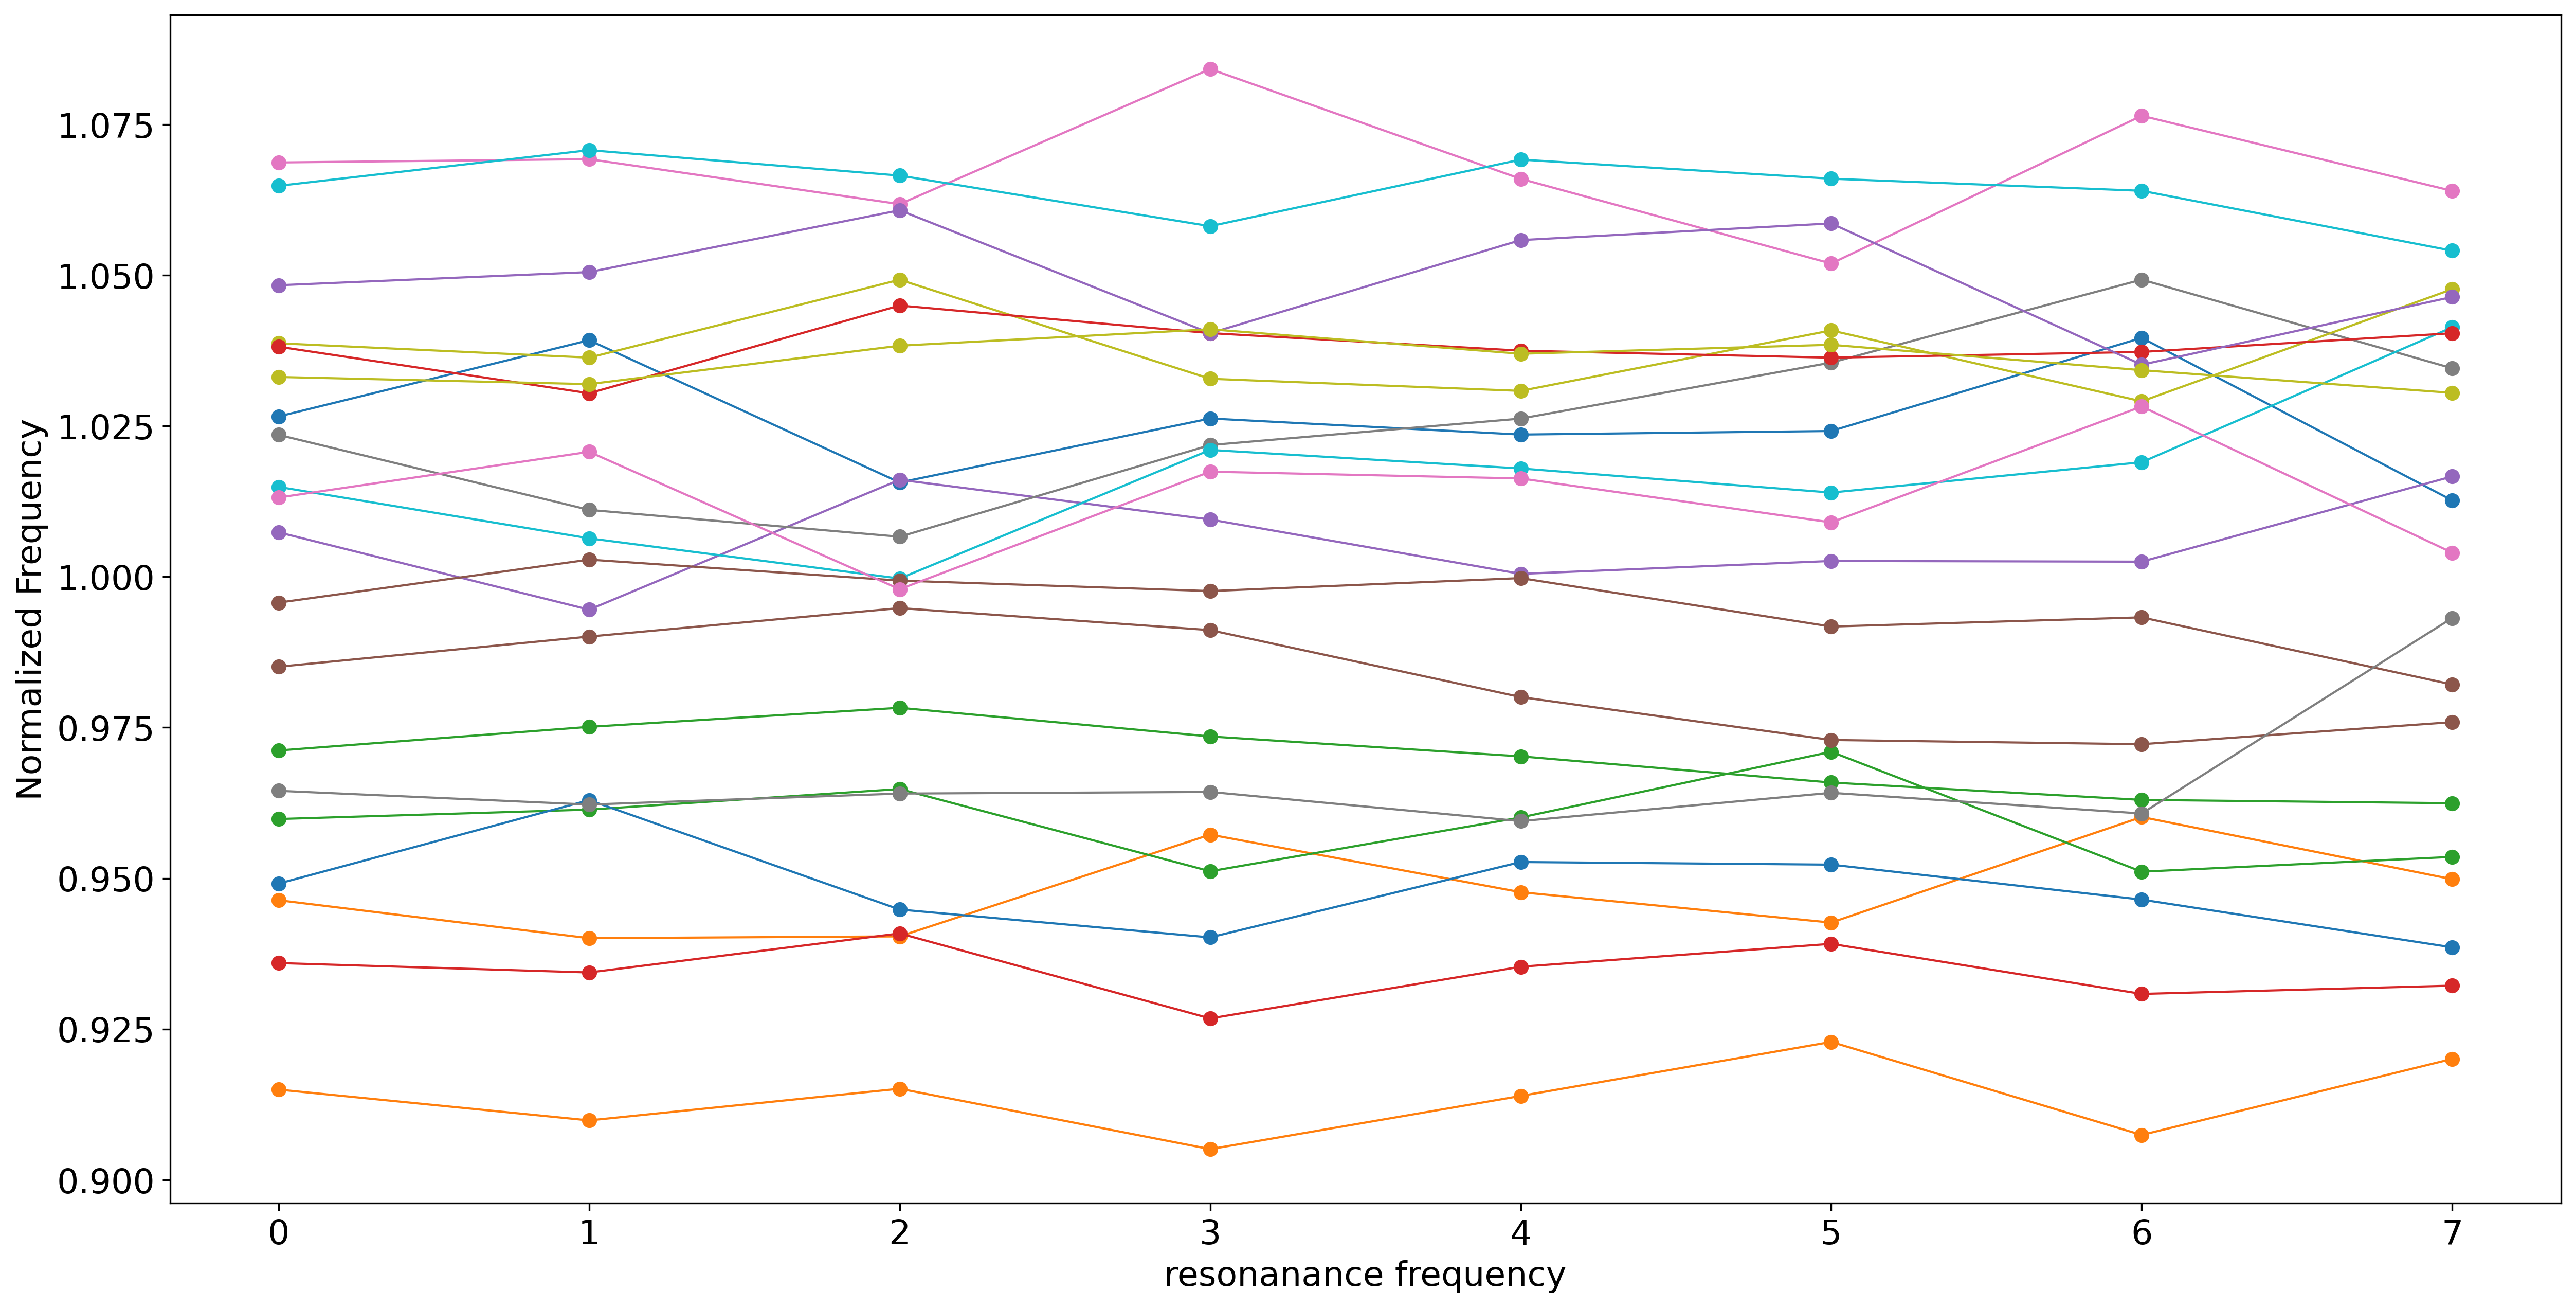

In [52]:
df_plot = pd.DataFrame(frequencies)
df_plot=df_plot.apply(lambda x: x/x.mean(),axis=1)
df_plot.plot(marker='o',linestyle='-',linewidth=1,figsize=(20,10),legend=False)
plt.ylabel('Normalized Frequency')
plt.xlabel('resonanance frequency')

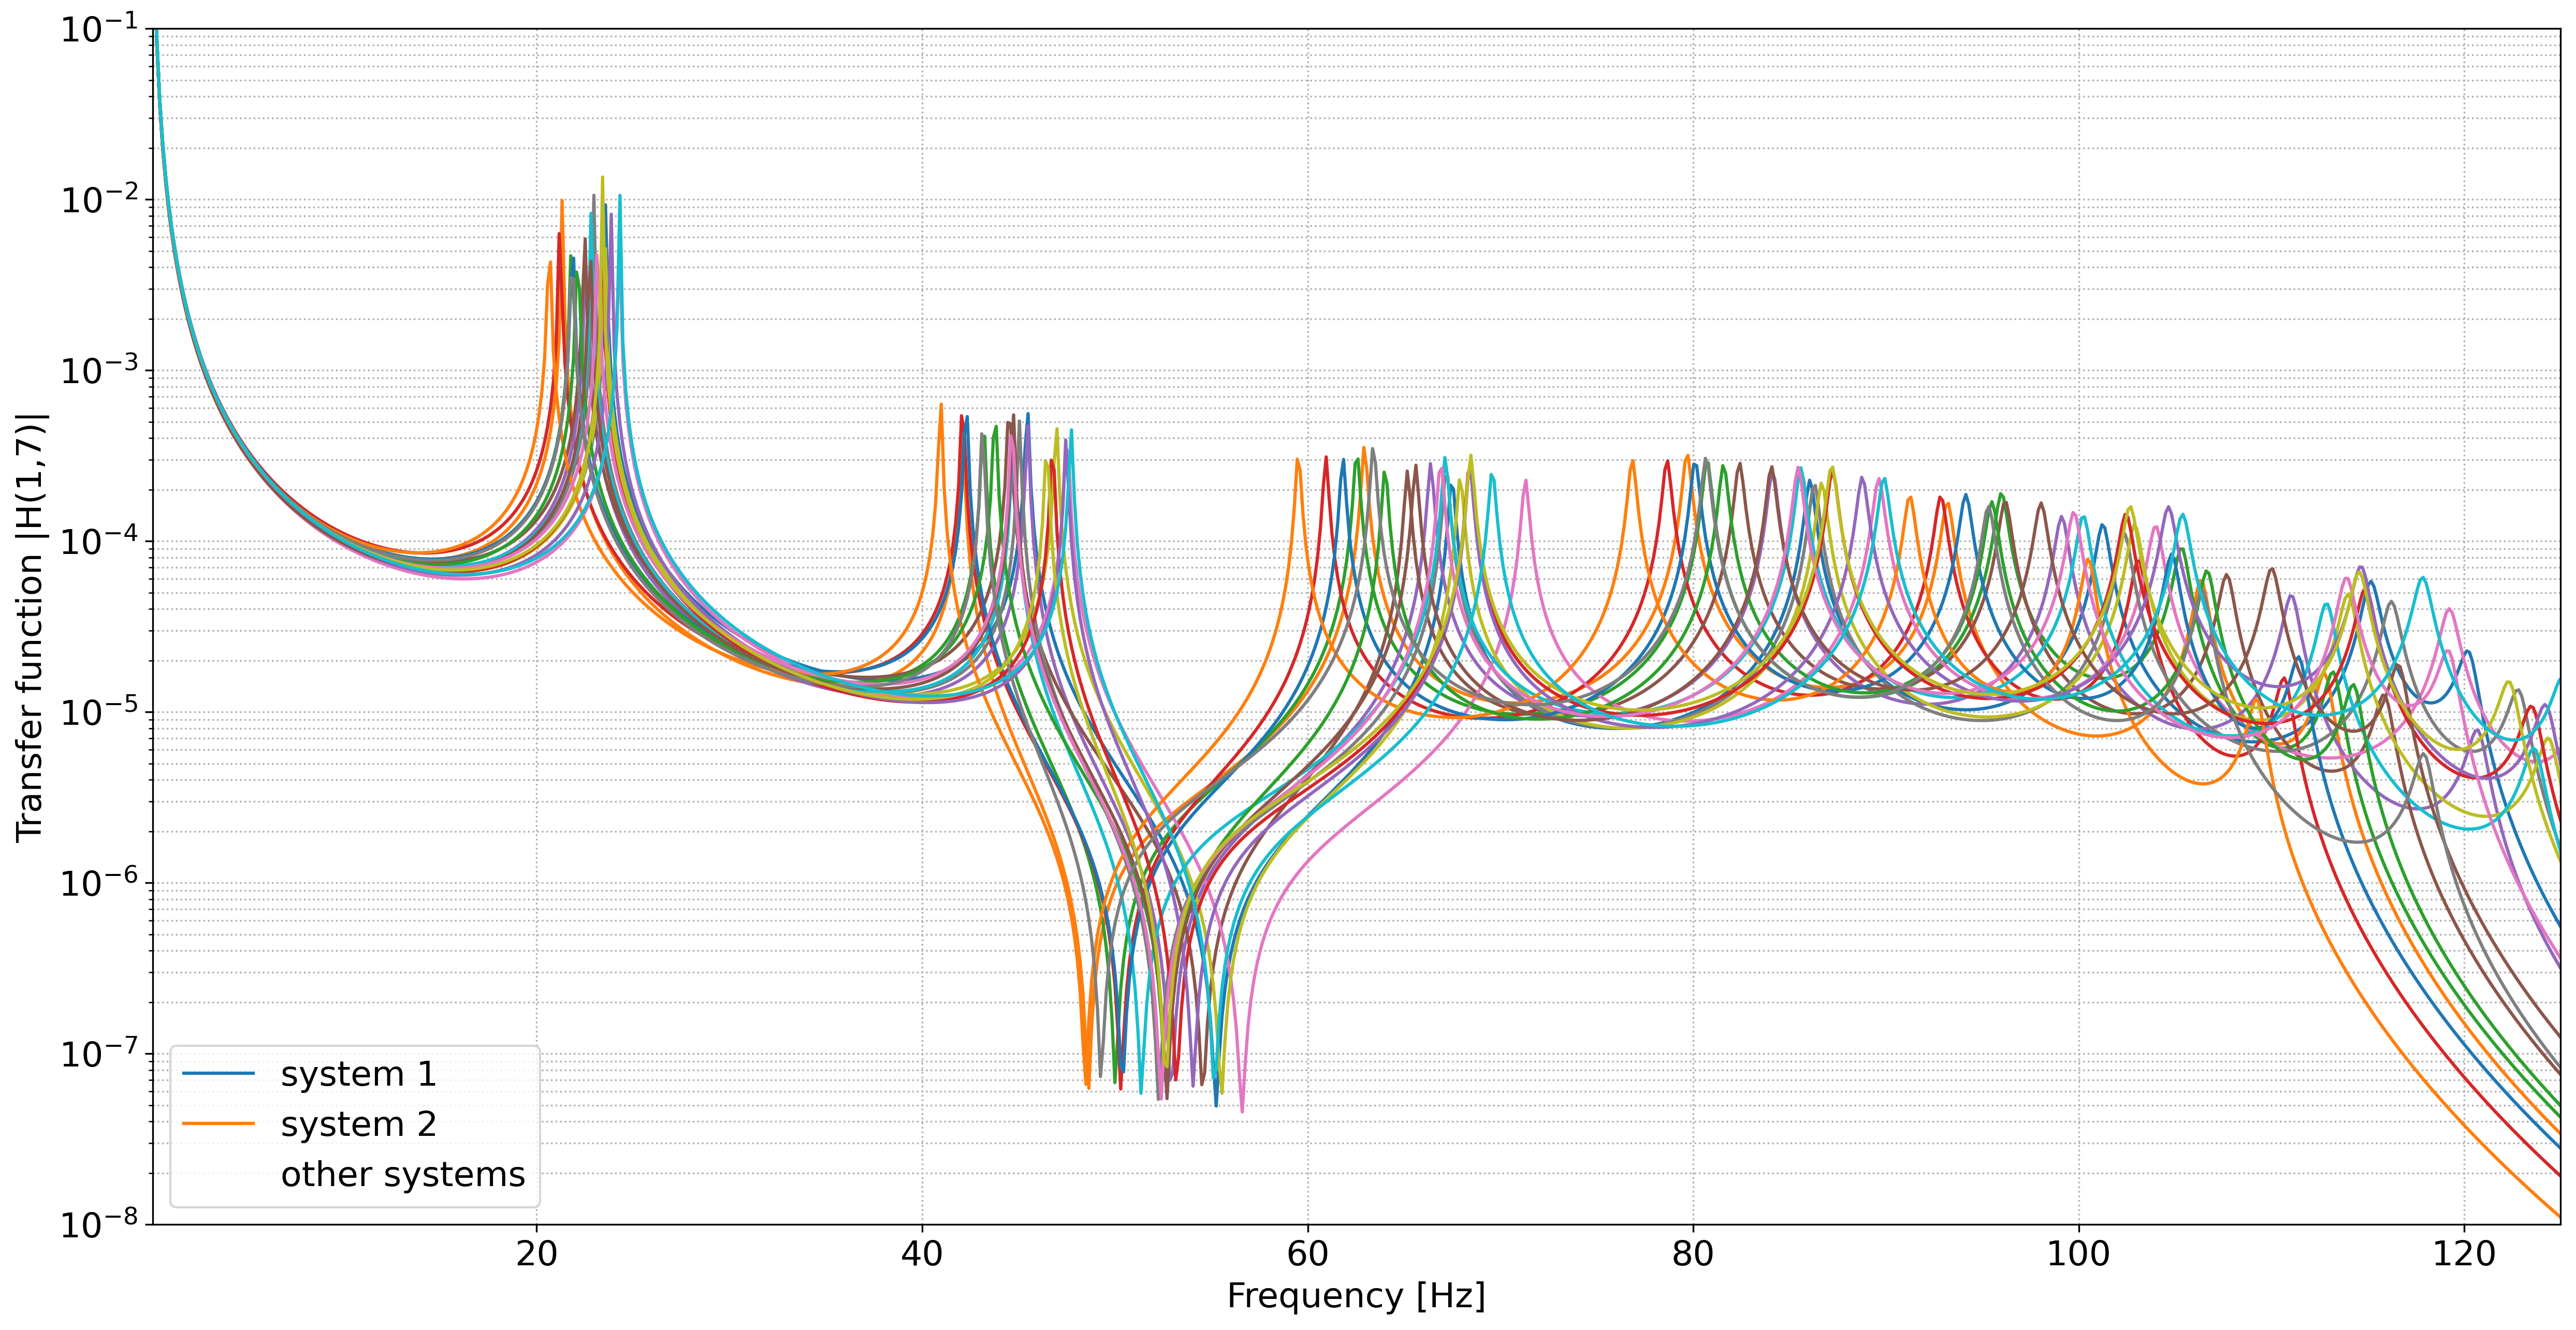

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

# plot the transfer functions for each system
for sys_name, h_ij in transfer_functions.items():
    if sys_name in ['system 1', 'system 2', 'system 20']:
        plt.plot(frequency, h_ij, label=sys_name, linestyle='-')
    else:
        plt.plot(frequency, h_ij, linestyle='-')

# create a legend with only the desired system labels
plt.legend(['system 1', 'system 2',  '...'], loc='lower left')

# add a text entry to the legend to represent the rest of the systems
plt.gca().get_legend().legendHandles[-1].set_visible(False) # hide the last entry (i.e., '...')
plt.gca().get_legend().texts[-1].set_text('other systems') # update the text for the last entry

plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Transfer function |H(1,7)|')

plt.xlim(0.1,125)
plt.ylim(1e-8,1e-1)
plt.grid(visible=True, which='both', axis='both', linestyle=':')

plt.show()
plt.close()


In [50]:
population.heterogenise(std=0.1)

# Variability Due anomaly for one system

In [8]:
population_manipulator = PopulationManipulator(population)


In [9]:
anomaly_levels = [i for i in np.arange(0,0.14,0.001)]


In [10]:
frequencies = dict()
transfer_functions = dict()
anomaly_levels = [i for i in np.arange(0,0.14,0.001)]
for i,anomaly_level in enumerate(anomaly_levels):
    requests = [{'type': 'anomaly', 'location': 5, 'anomaly_size': anomaly_level, 'anomaly_type': 'stiffness'}]
    population_affected = population_manipulator.affect(requests)
    sys= MdofSystem(**population_affected.systems_matrices['system_0'])
    frequency = np.linspace(0, 150, 1000)
    omega = 2 * np.pi * frequency
    frequencies[anomaly_level]=sys.resonance_frequency()[::-1]
    transfer_functions[i]=np.abs(sys.transfer_function(omega,i=1,j=7))

    

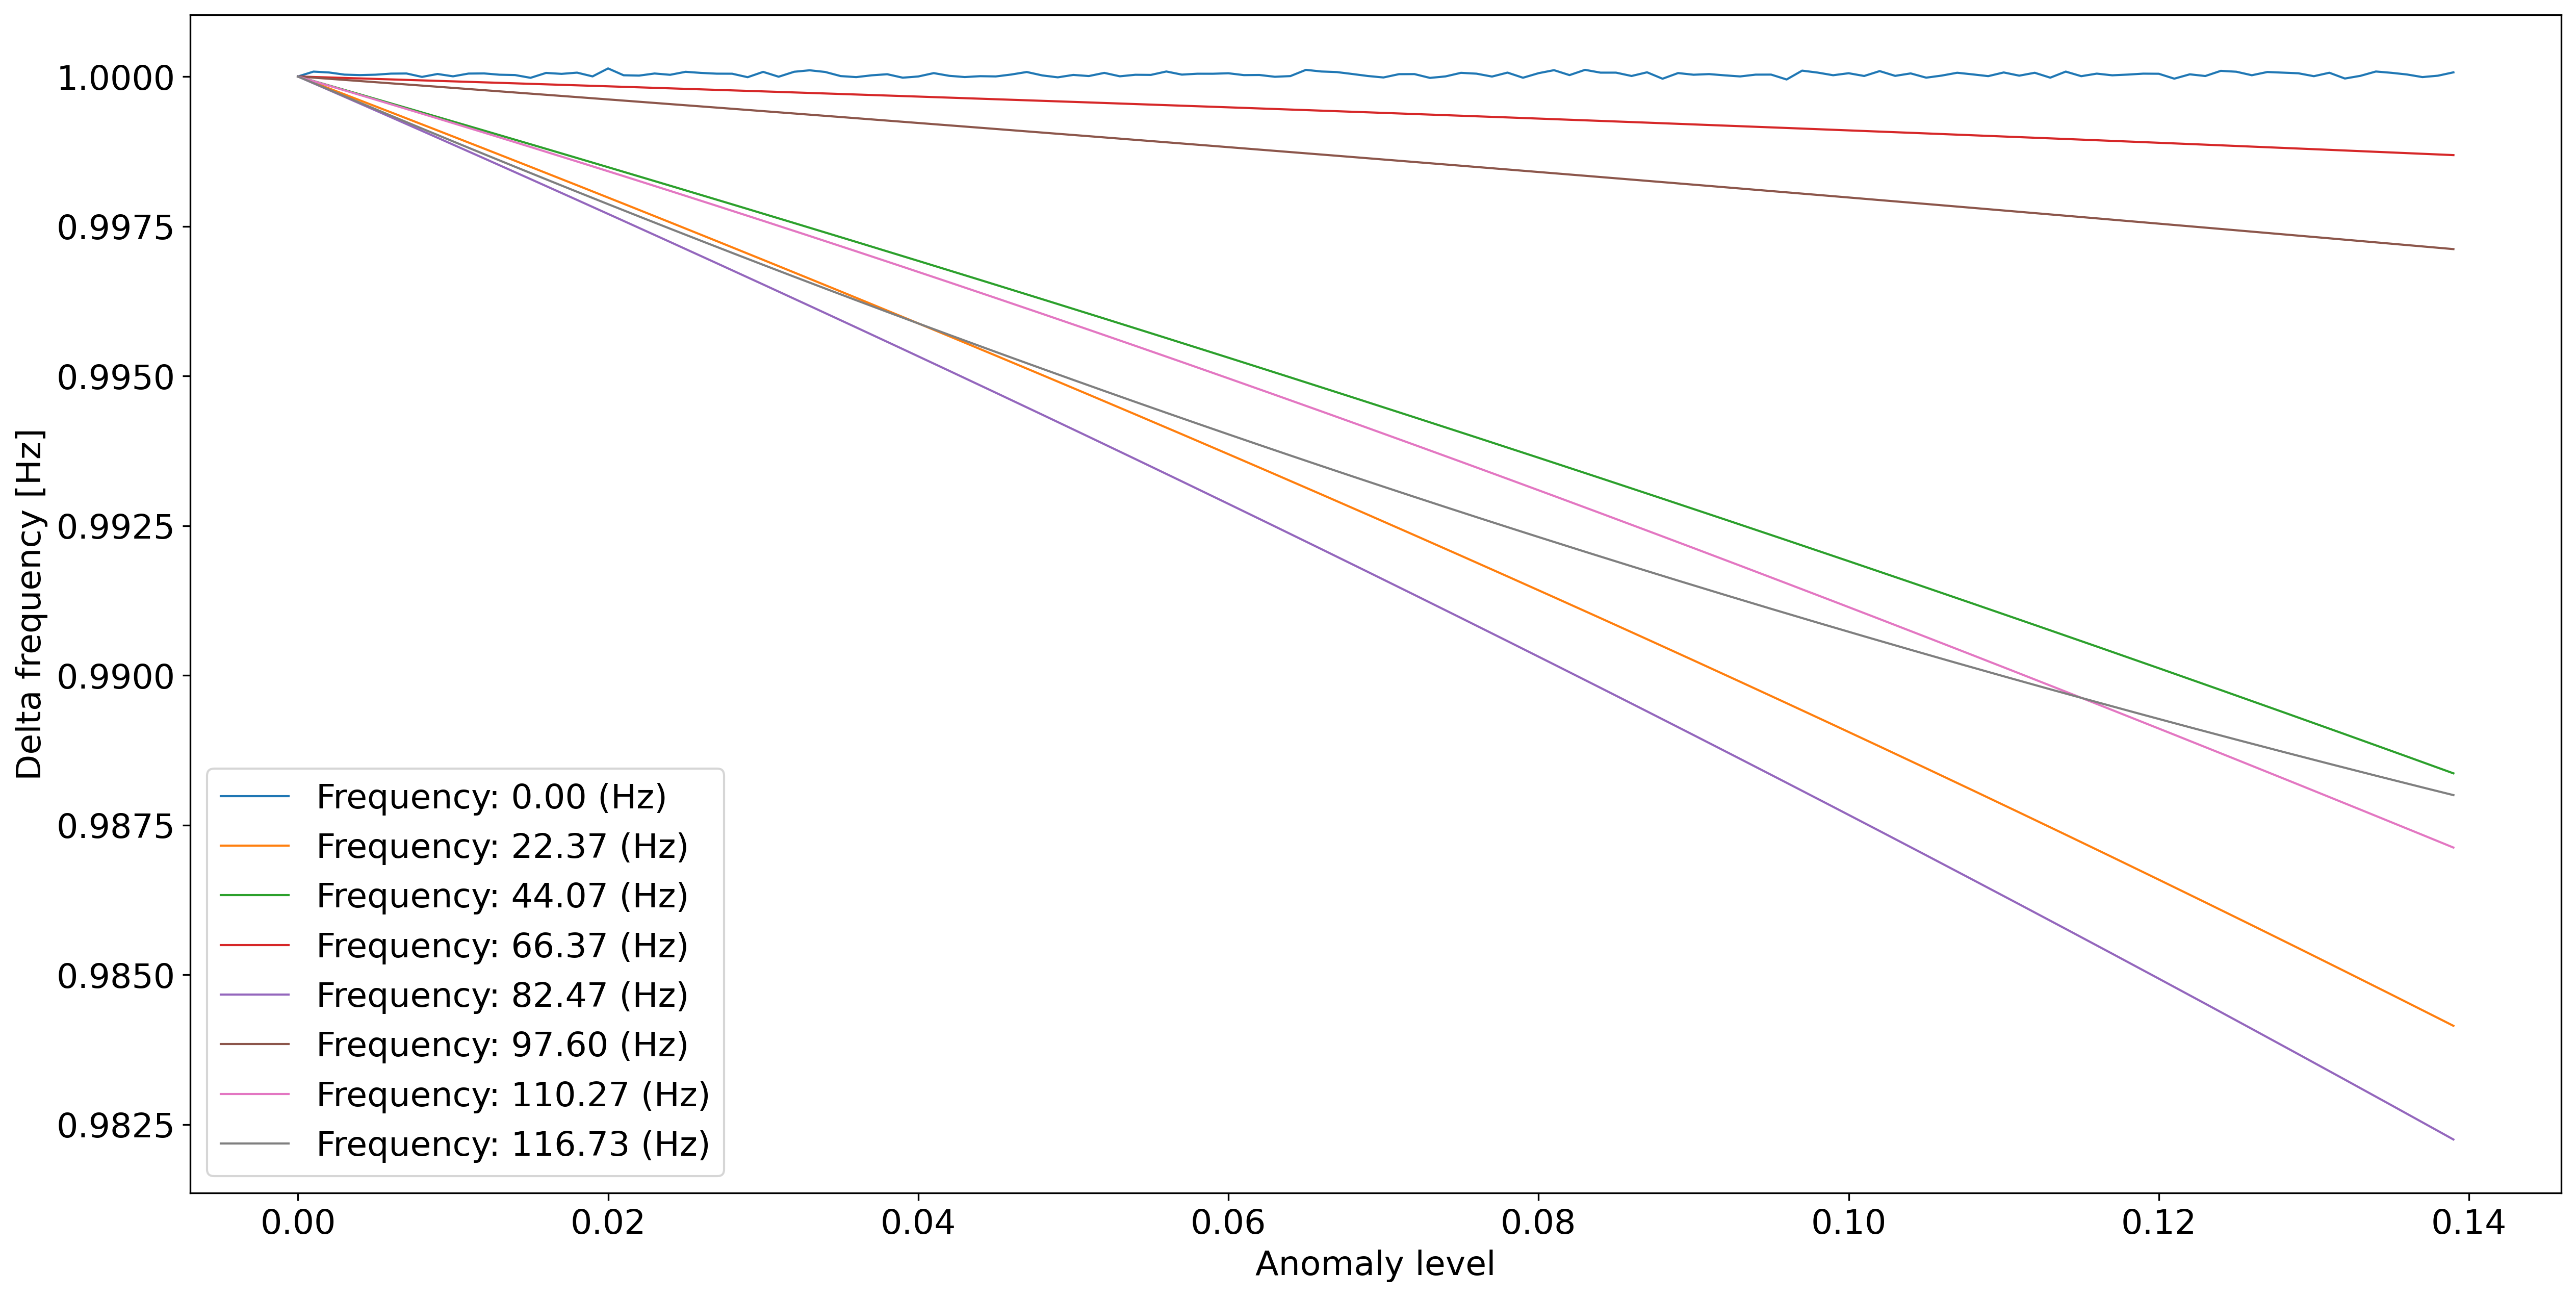

In [11]:
df_plot = pd.DataFrame(frequencies).T
varition = (df_plot.iloc[-1]-df_plot.iloc[0])/df_plot.iloc[0]

labels = ['Frequency: {:.2f} (Hz)'.format(df_plot[col].min()) for col in df_plot.columns]

df_plot=df_plot.apply(lambda x: x/x[0],axis=0)
df_plot.plot(marker='',linestyle='-',linewidth=1,figsize=(20,10),legend=True)
plt.ylabel('Delta frequency [Hz]')
plt.xlabel('Anomaly level')

plt.legend(labels, loc='lower left')


In [12]:
varition*100

0    0.007
1   -1.585
2   -1.164
3   -0.131
4   -1.775
5   -0.288
6   -1.288
7   -1.200
dtype: float64

/tmp/ipykernel_84776/4030546604.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scm)


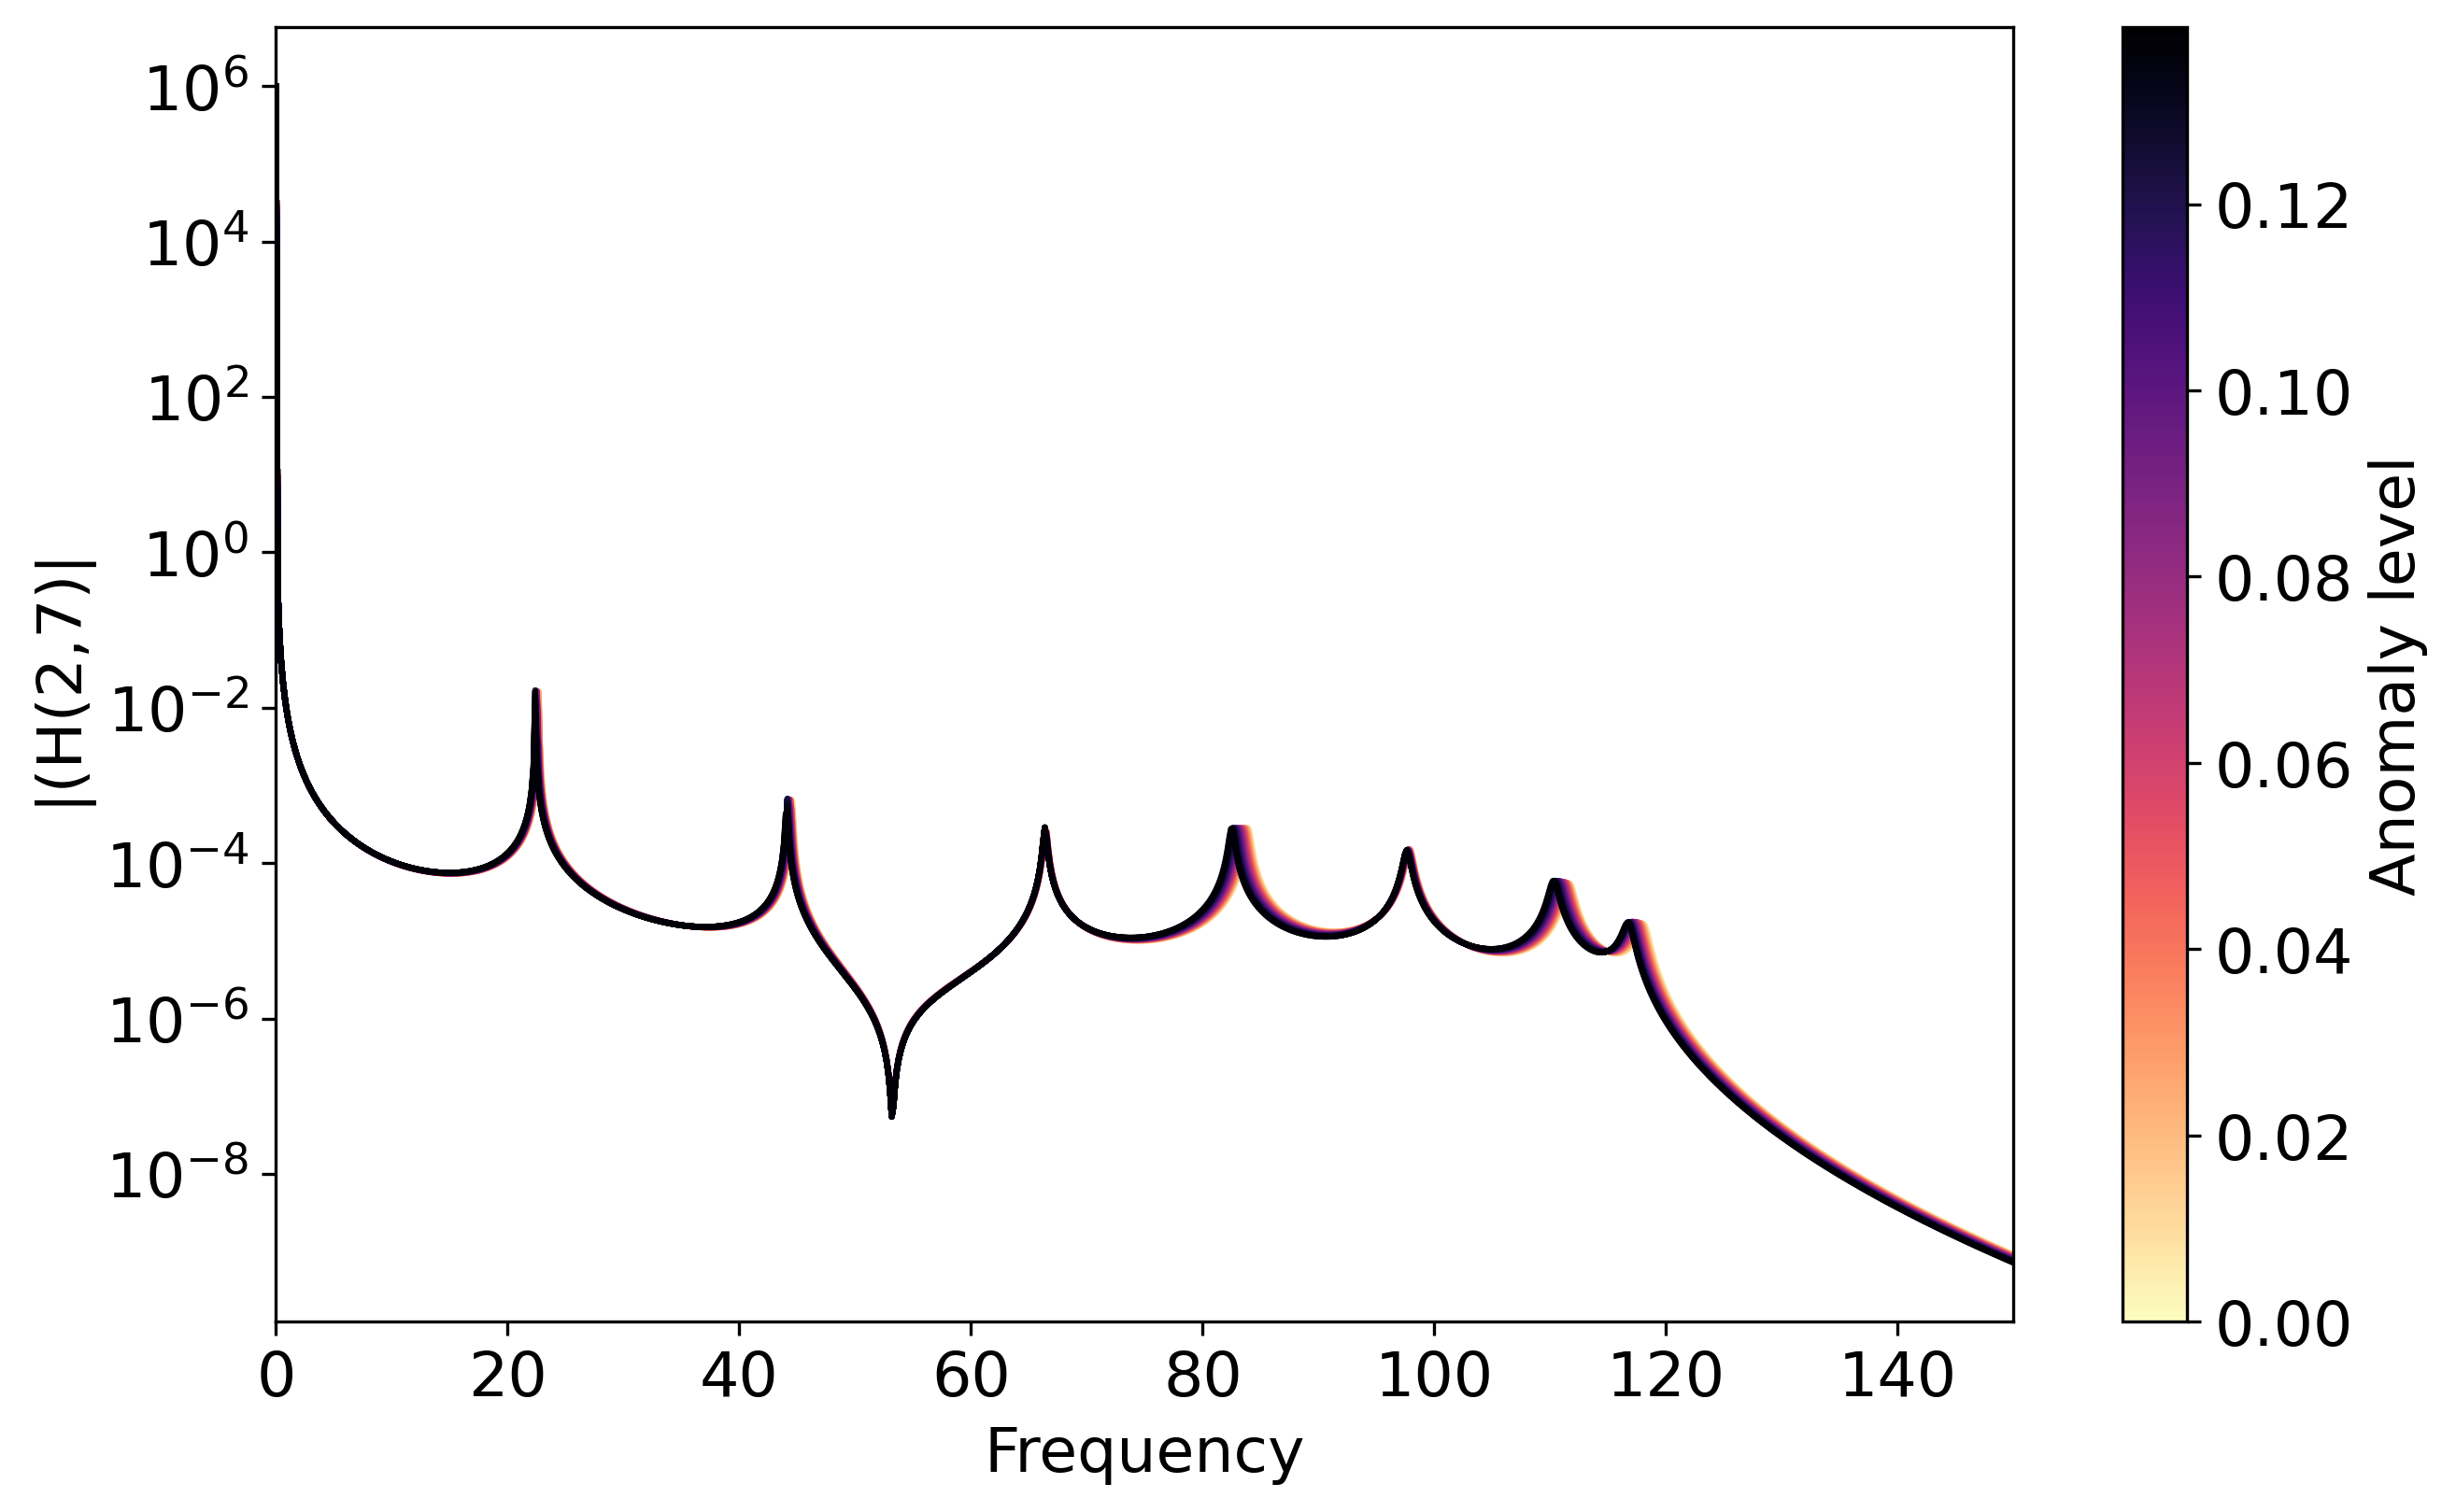

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

color = sns.color_palette('magma_r',len(anomaly_levels))

fig, ax = plt.subplots()

for i,anomaly_level in enumerate(anomaly_levels):
    ax.plot(frequency, transfer_functions[i], color=color[i], alpha=0.5)
ax.set_yscale('log')
ax.set_xlabel('Frequency')
ax.set_ylabel('|(H(2,7)|')

# create a scalar mappable with the 'flare' colormap
scm = plt.cm.ScalarMappable(cmap='magma_r')
scm.set_array(anomaly_levels)

# add a color bar to the plot
cbar = plt.colorbar(scm)

# set the label for the color bar
cbar.set_label('Anomaly level')
plt.margins(x=0)
plt.show()

# Variability Due envirement for one system

In [14]:
frequencies = dict()
transfer_functions = dict()
for latent in range(0,100):
    
    requests = [{'type': 'environment', 'latent_value': latent, 'coefficients': 'load'}]
    population_affected = population_manipulator.affect(requests)
    sys= MdofSystem(**population_affected.systems_matrices['system_0'])
    frequency = np.linspace(0, 150, 1000)
    omega = 2 * np.pi * frequency
    frequencies[latent]=sys.resonance_frequency()[::-1]
    transfer_functions[latent]=np.abs(sys.transfer_function(omega,i=1,j=7))


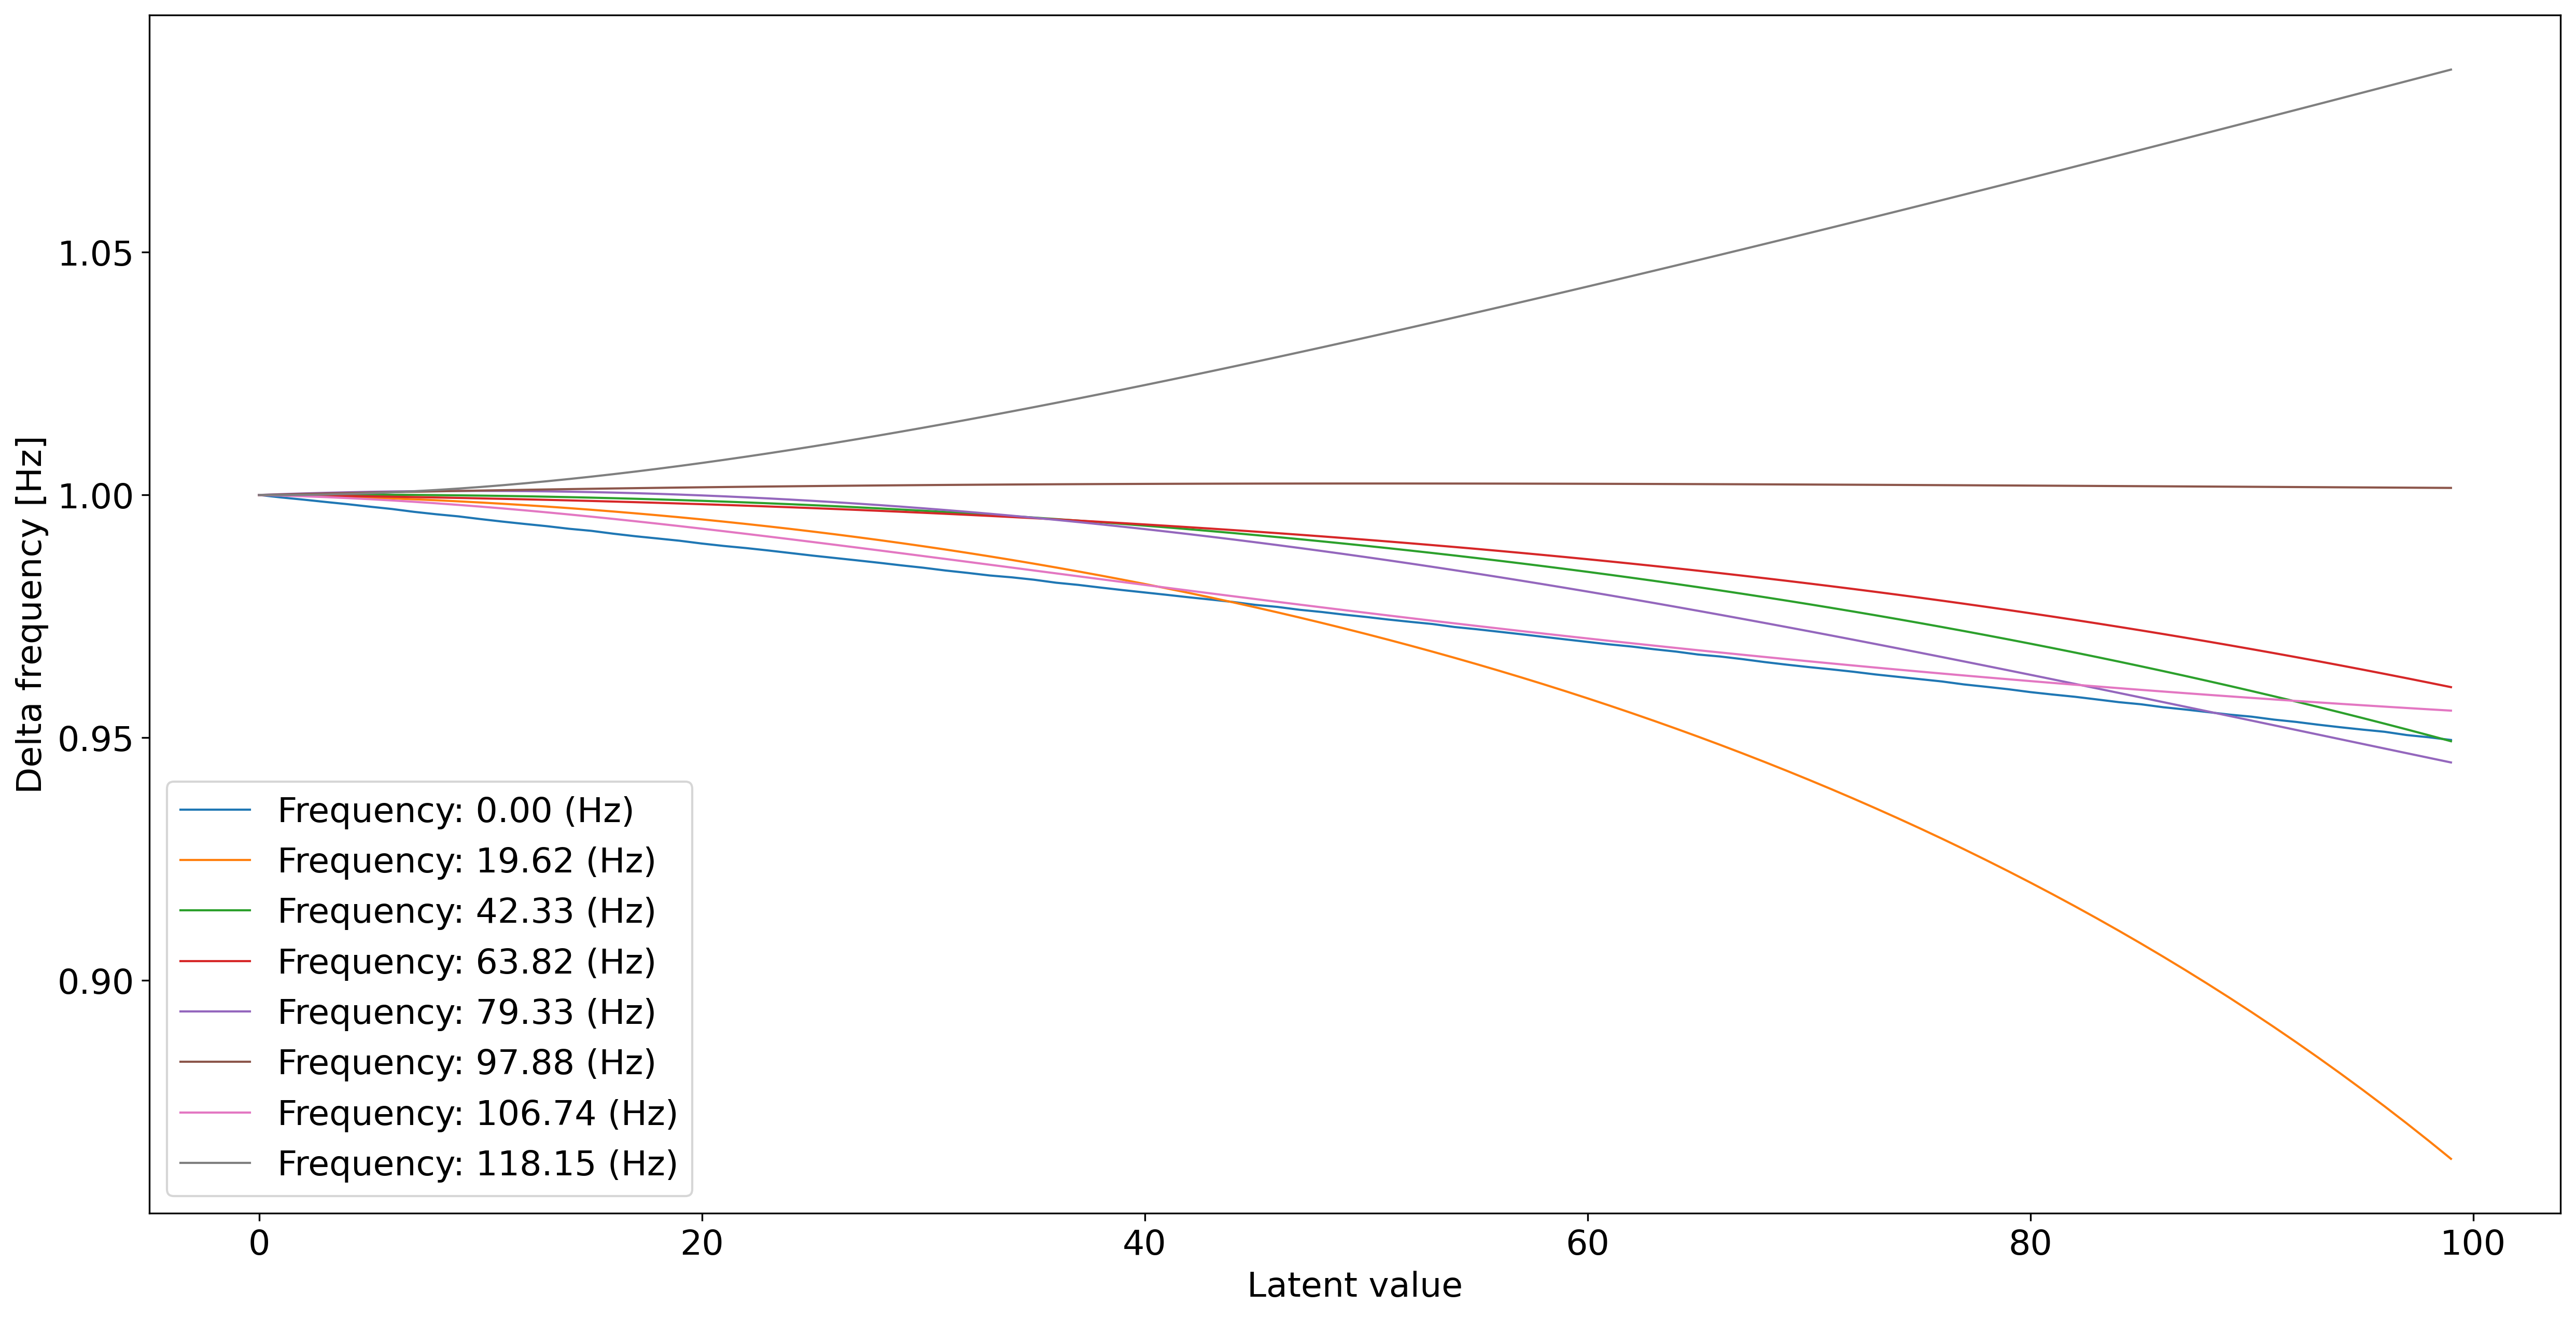

In [15]:
df_plot = pd.DataFrame(frequencies).T
varition = (df_plot.iloc[-1]-df_plot.iloc[0])/df_plot.iloc[0]

labels = ['Frequency: {:.2f} (Hz)'.format(df_plot[col].min()) for col in df_plot.columns]

df_plot=df_plot.apply(lambda x: x/x[0],axis=0)
df_plot.plot(marker='',linestyle='-',linewidth=1,figsize=(20,10),legend=True)
plt.ylabel('Delta frequency [Hz]')
plt.xlabel('Latent value')

plt.legend(labels, loc='lower left')

In [16]:
varition*100

0    -5.048
1   -13.676
2    -5.073
3    -3.959
4    -5.511
5     0.145
6    -4.443
7     8.763
dtype: float64

In [17]:
frequencies.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

/tmp/ipykernel_84776/623544758.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scm)


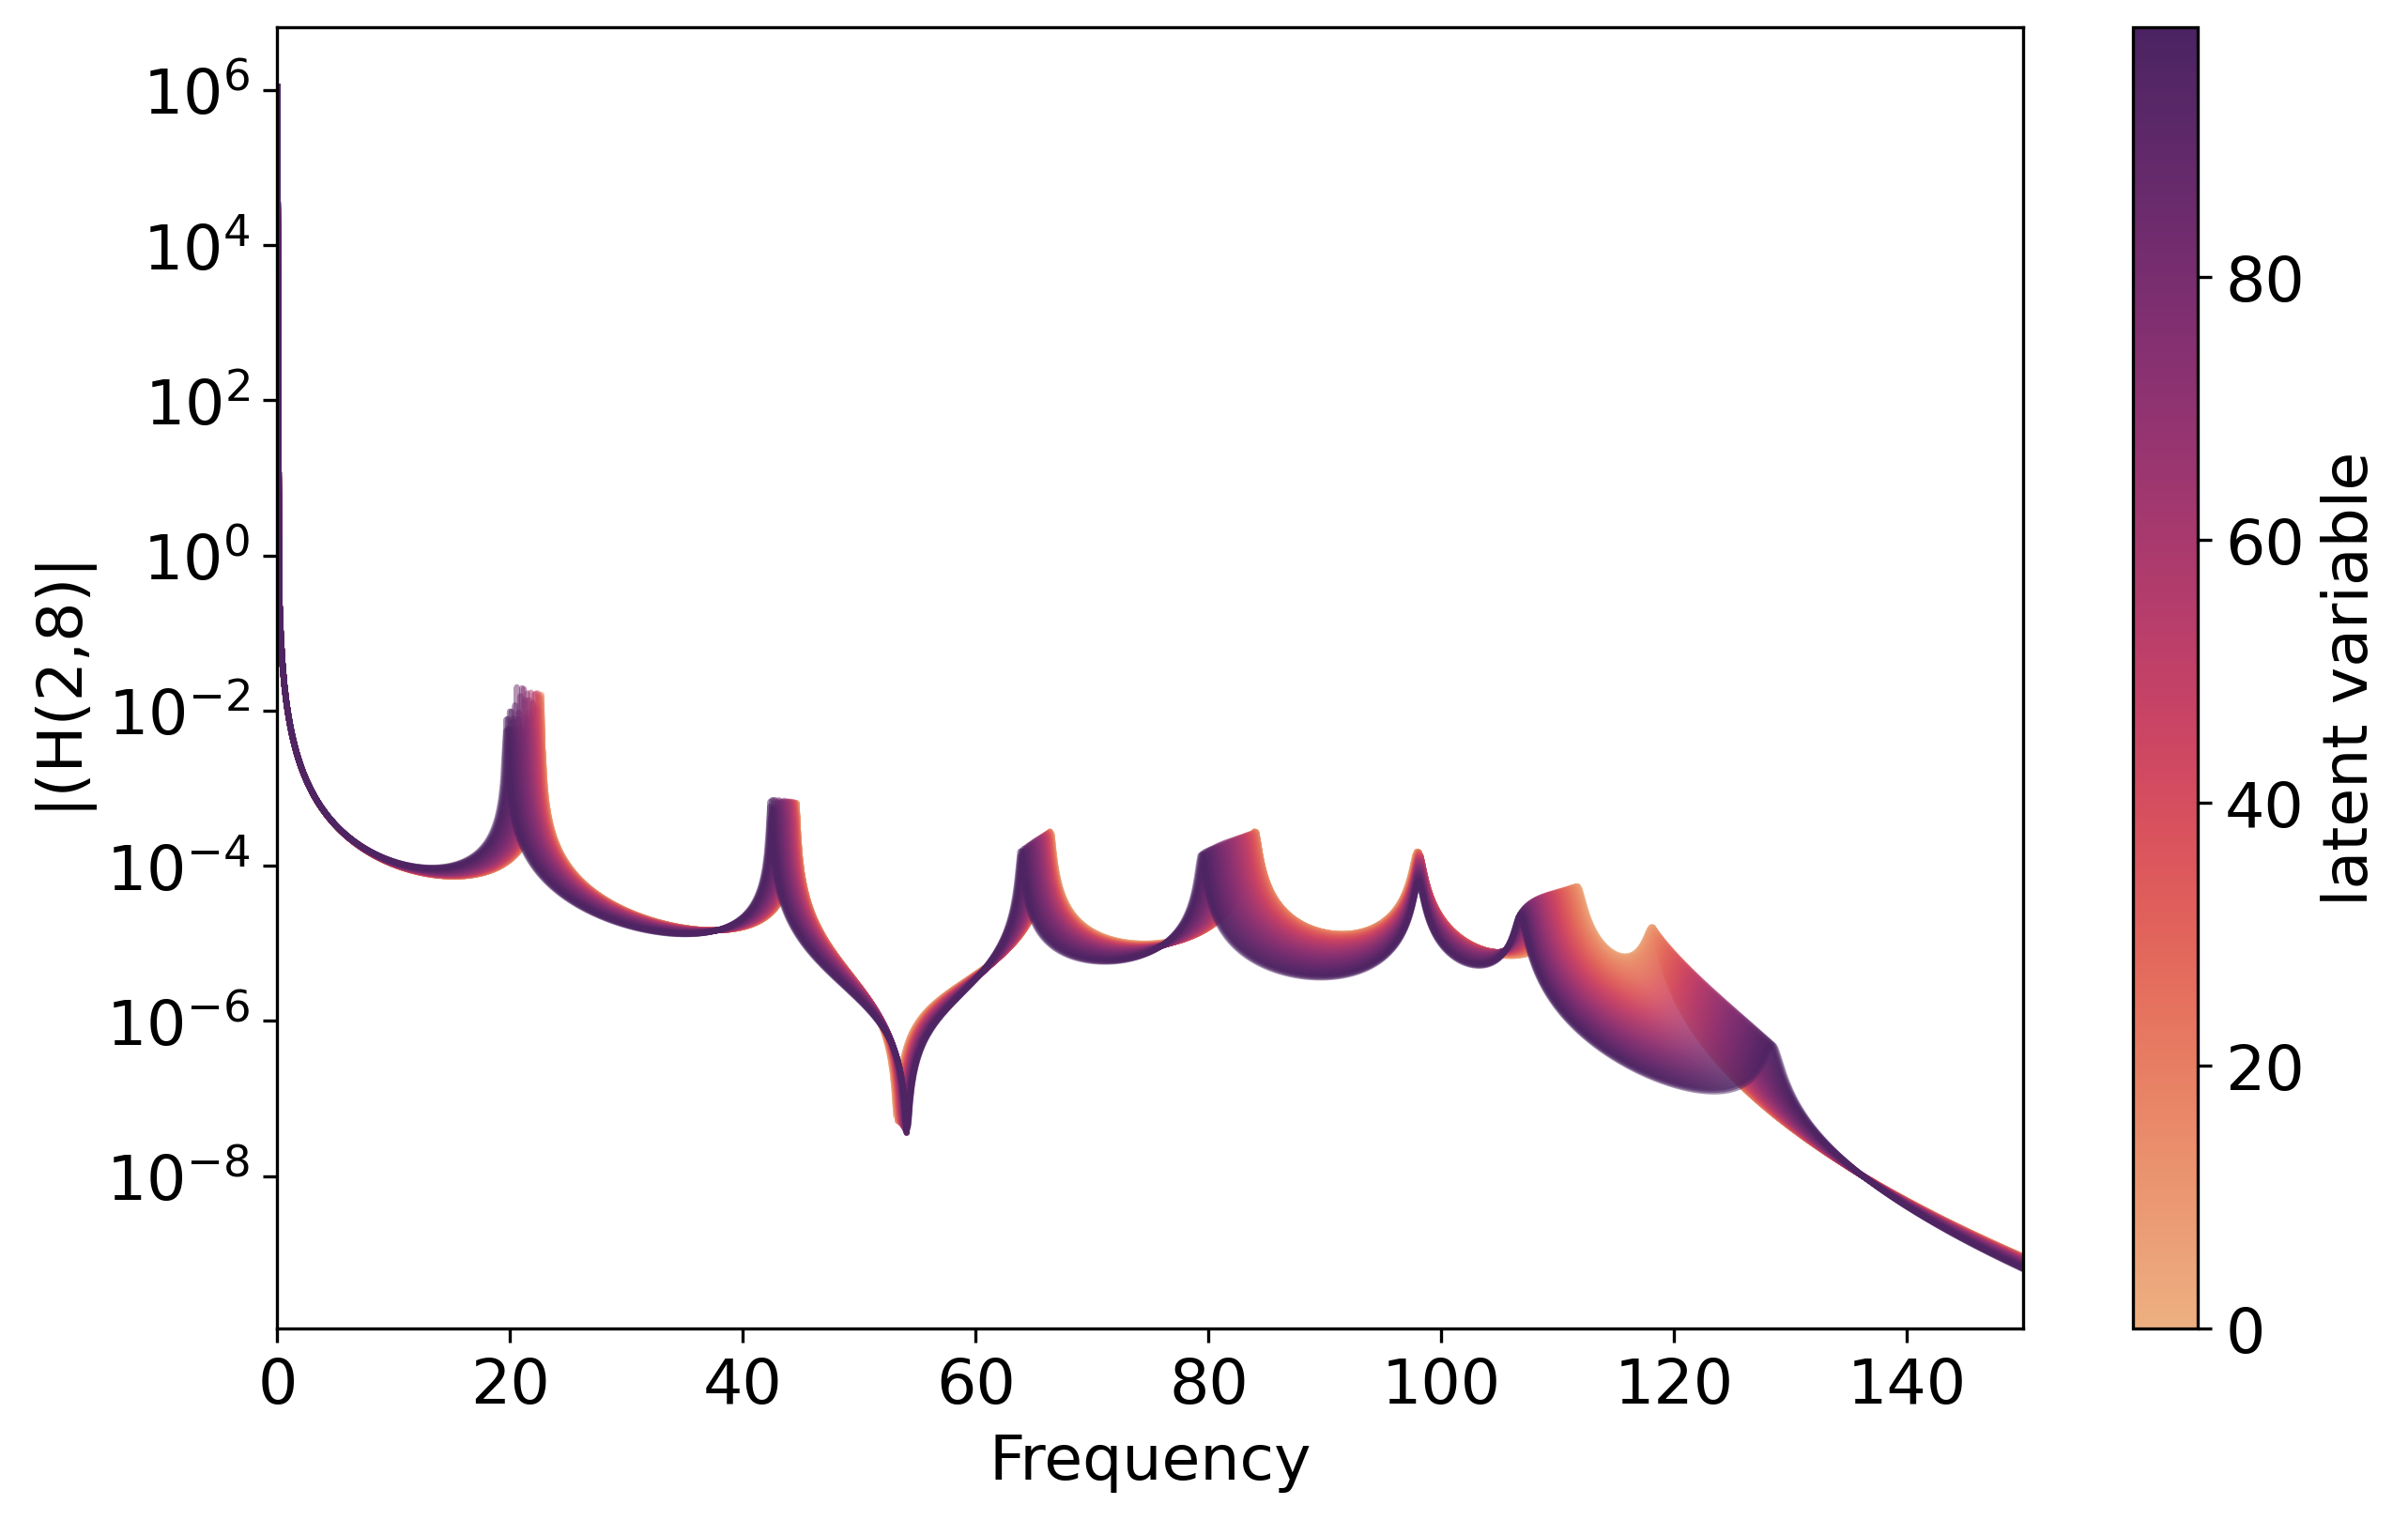

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

color = sns.color_palette('flare',len(frequencies))

fig, ax = plt.subplots()

for i in list(frequencies.keys()):
    ax.plot(frequency, np.abs(transfer_functions[i])[:], color=color[i], alpha=0.5)
ax.set_yscale('log')
ax.set_xlabel('Frequency')
ax.set_ylabel('|(H(2,8)|')

# create a scalar mappable with the 'flare' colormap
scm = plt.cm.ScalarMappable(cmap='flare')
scm.set_array(list(range(len(list(frequencies.keys())))))

# add a color bar to the plot
cbar = plt.colorbar(scm)

# set the label for the color bar
cbar.set_label('latent variable')
plt.margins(x=0)
plt.show()

In [19]:
from itertools import product
frequencies = dict()
transfer_functions = dict()
for i in range(0,240):
    anomaly_level= 0 
    latent = i
    if i > 100:
        anomaly_level = (i-100)/1000
        latent = 100

    requests = [{'type': 'anomaly', 'location': 5, 'anomaly_size': anomaly_level, 'anomaly_type': 'stiffness'},
    {'type': 'environment', 'latent_value': latent, 'coefficients': 'load'},
                ]
    population_affected = population_manipulator.affect(requests)
    sys= MdofSystem(**population_affected.systems_matrices['system_0'])
    frequency = np.linspace(0, 150, 1000)
    omega = 2 * np.pi * frequency
    frequencies[i]=sys.resonance_frequency()[::-1][1:]
    transfer_functions[i]=np.abs(sys.transfer_function(omega,i=1,j=7))


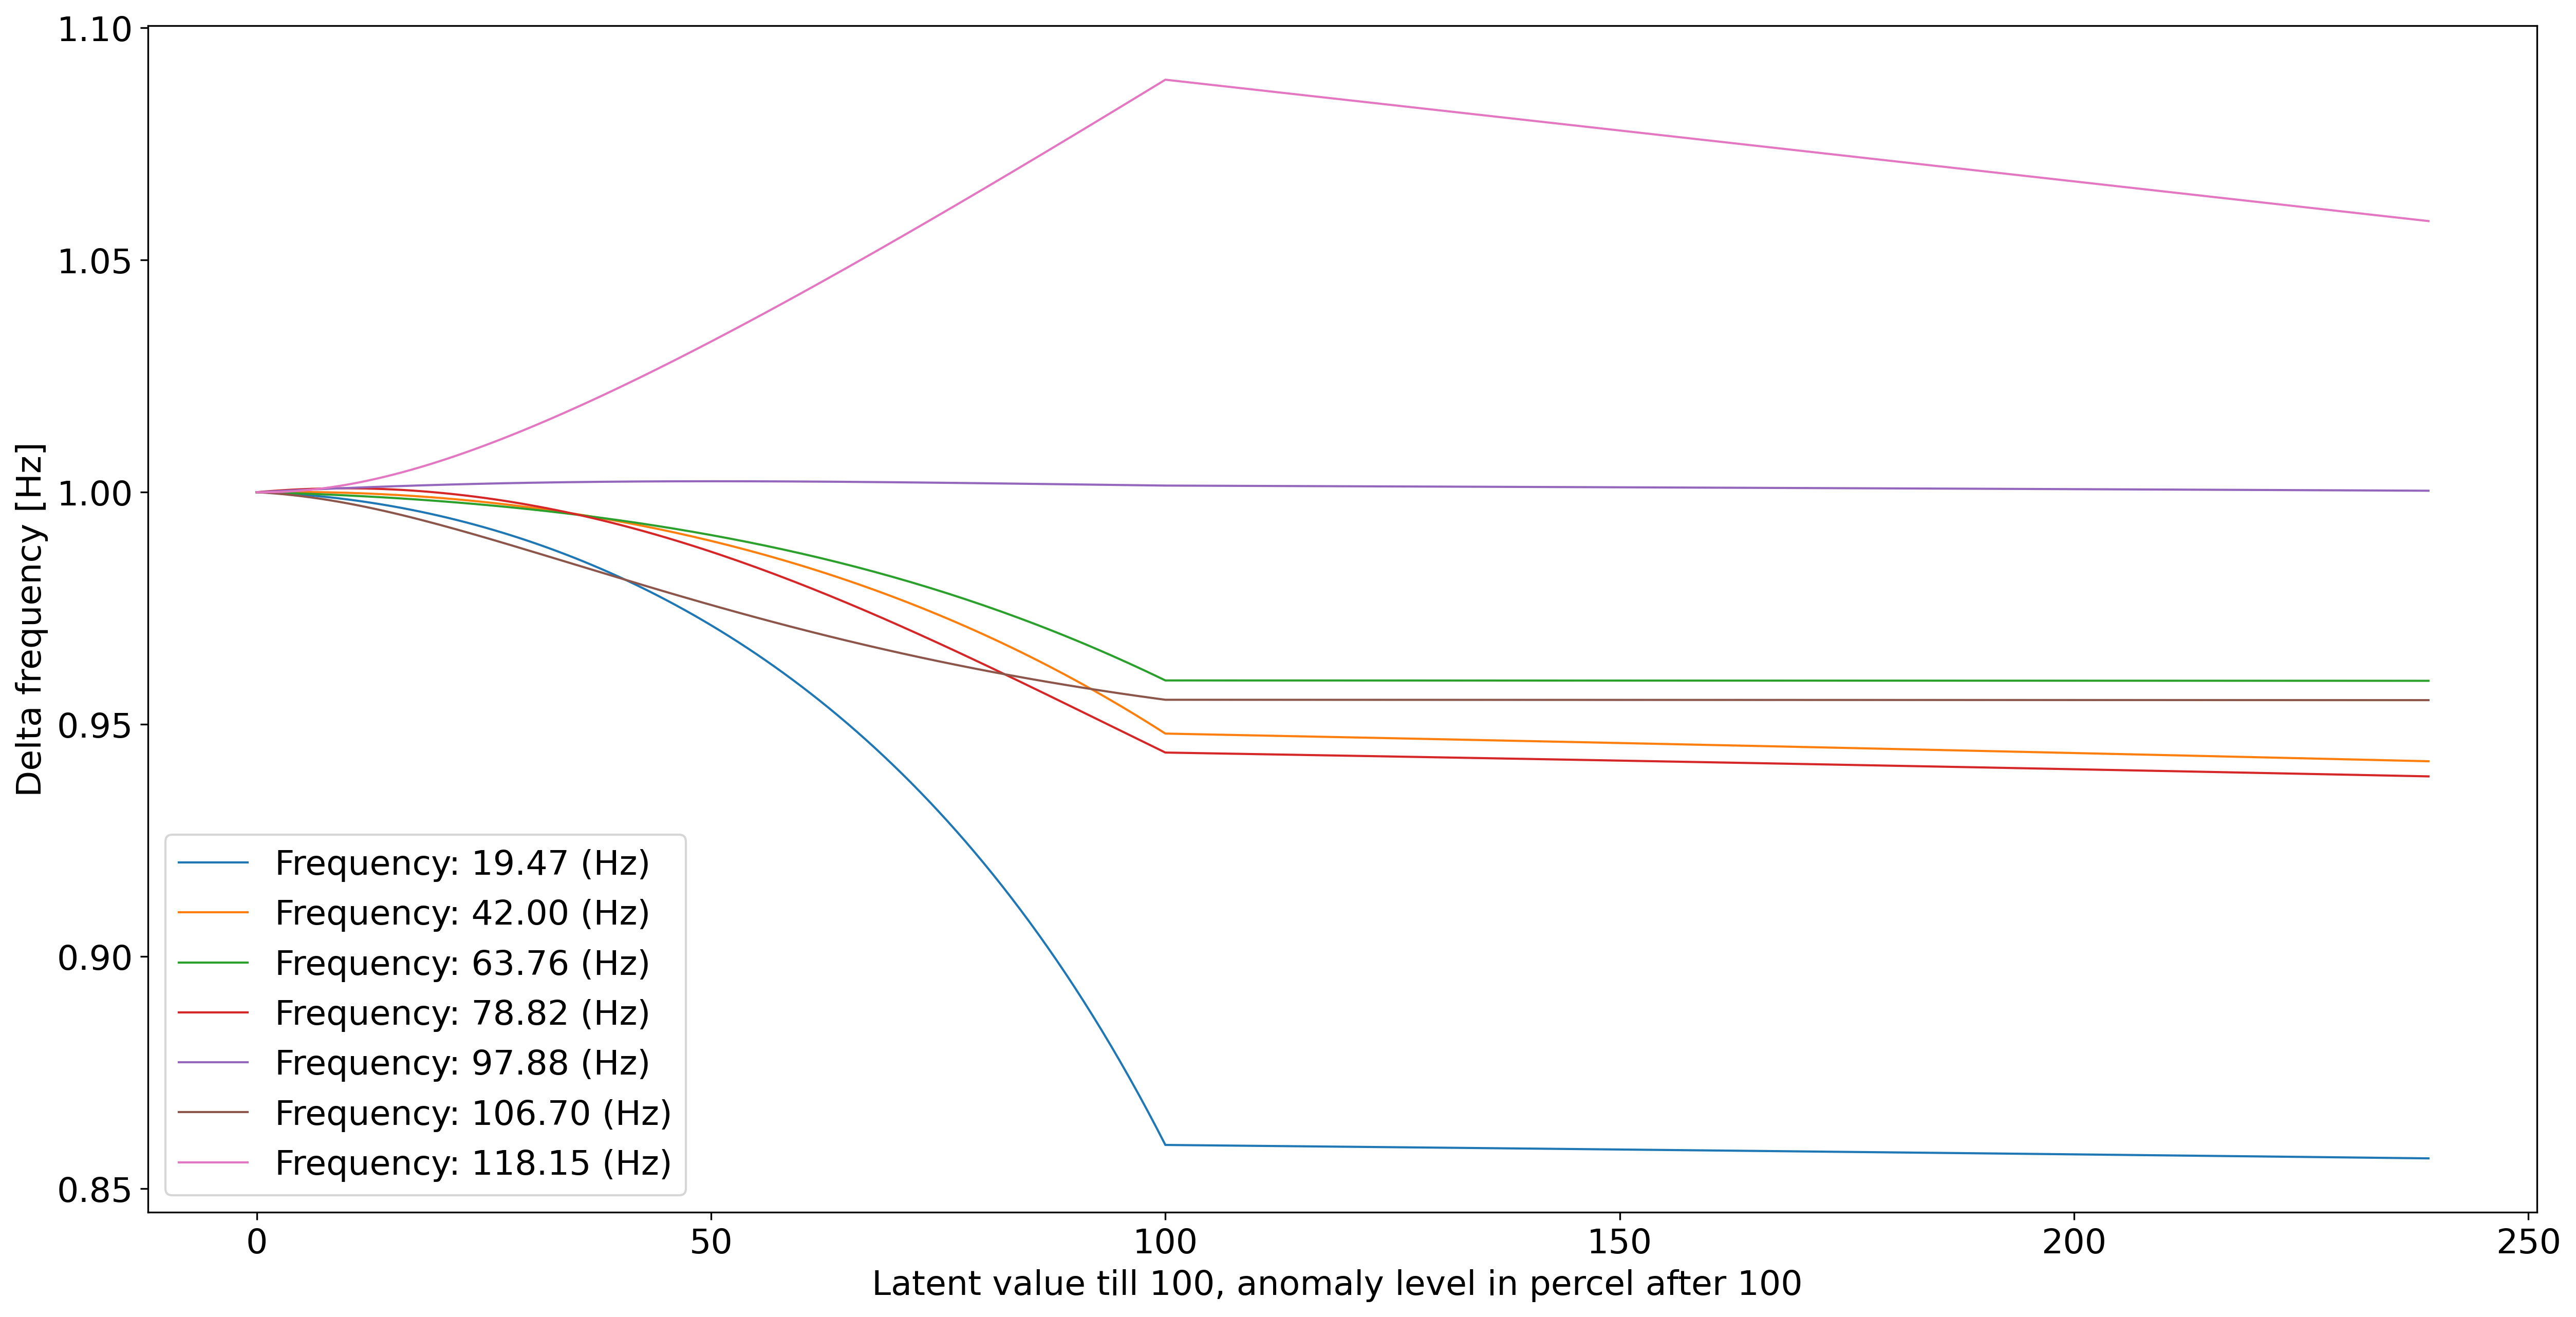

In [20]:
df_plot = pd.DataFrame(frequencies).T
varition = (df_plot.iloc[-1]-df_plot.iloc[0])/df_plot.iloc[0]

labels = ['Frequency: {:.2f} (Hz)'.format(df_plot[col].min()) for col in df_plot.columns]

df_plot=df_plot.apply(lambda x: x/x[0],axis=0)
df_plot.plot(marker='',linestyle='-',linewidth=1,figsize=(20,10),legend=True)
plt.ylabel('Delta frequency [Hz]')
plt.xlabel('Latent value till 100, anomaly level in percel after 100 ')

plt.legend(labels, loc='lower left')

the order of application of the envirement and anomaly doesn't change anything as it is just a multiplication by a value. this has been verifier 


In [21]:
frequency = np.linspace(0, 150, 1000)
omega = 2 * np.pi * frequency

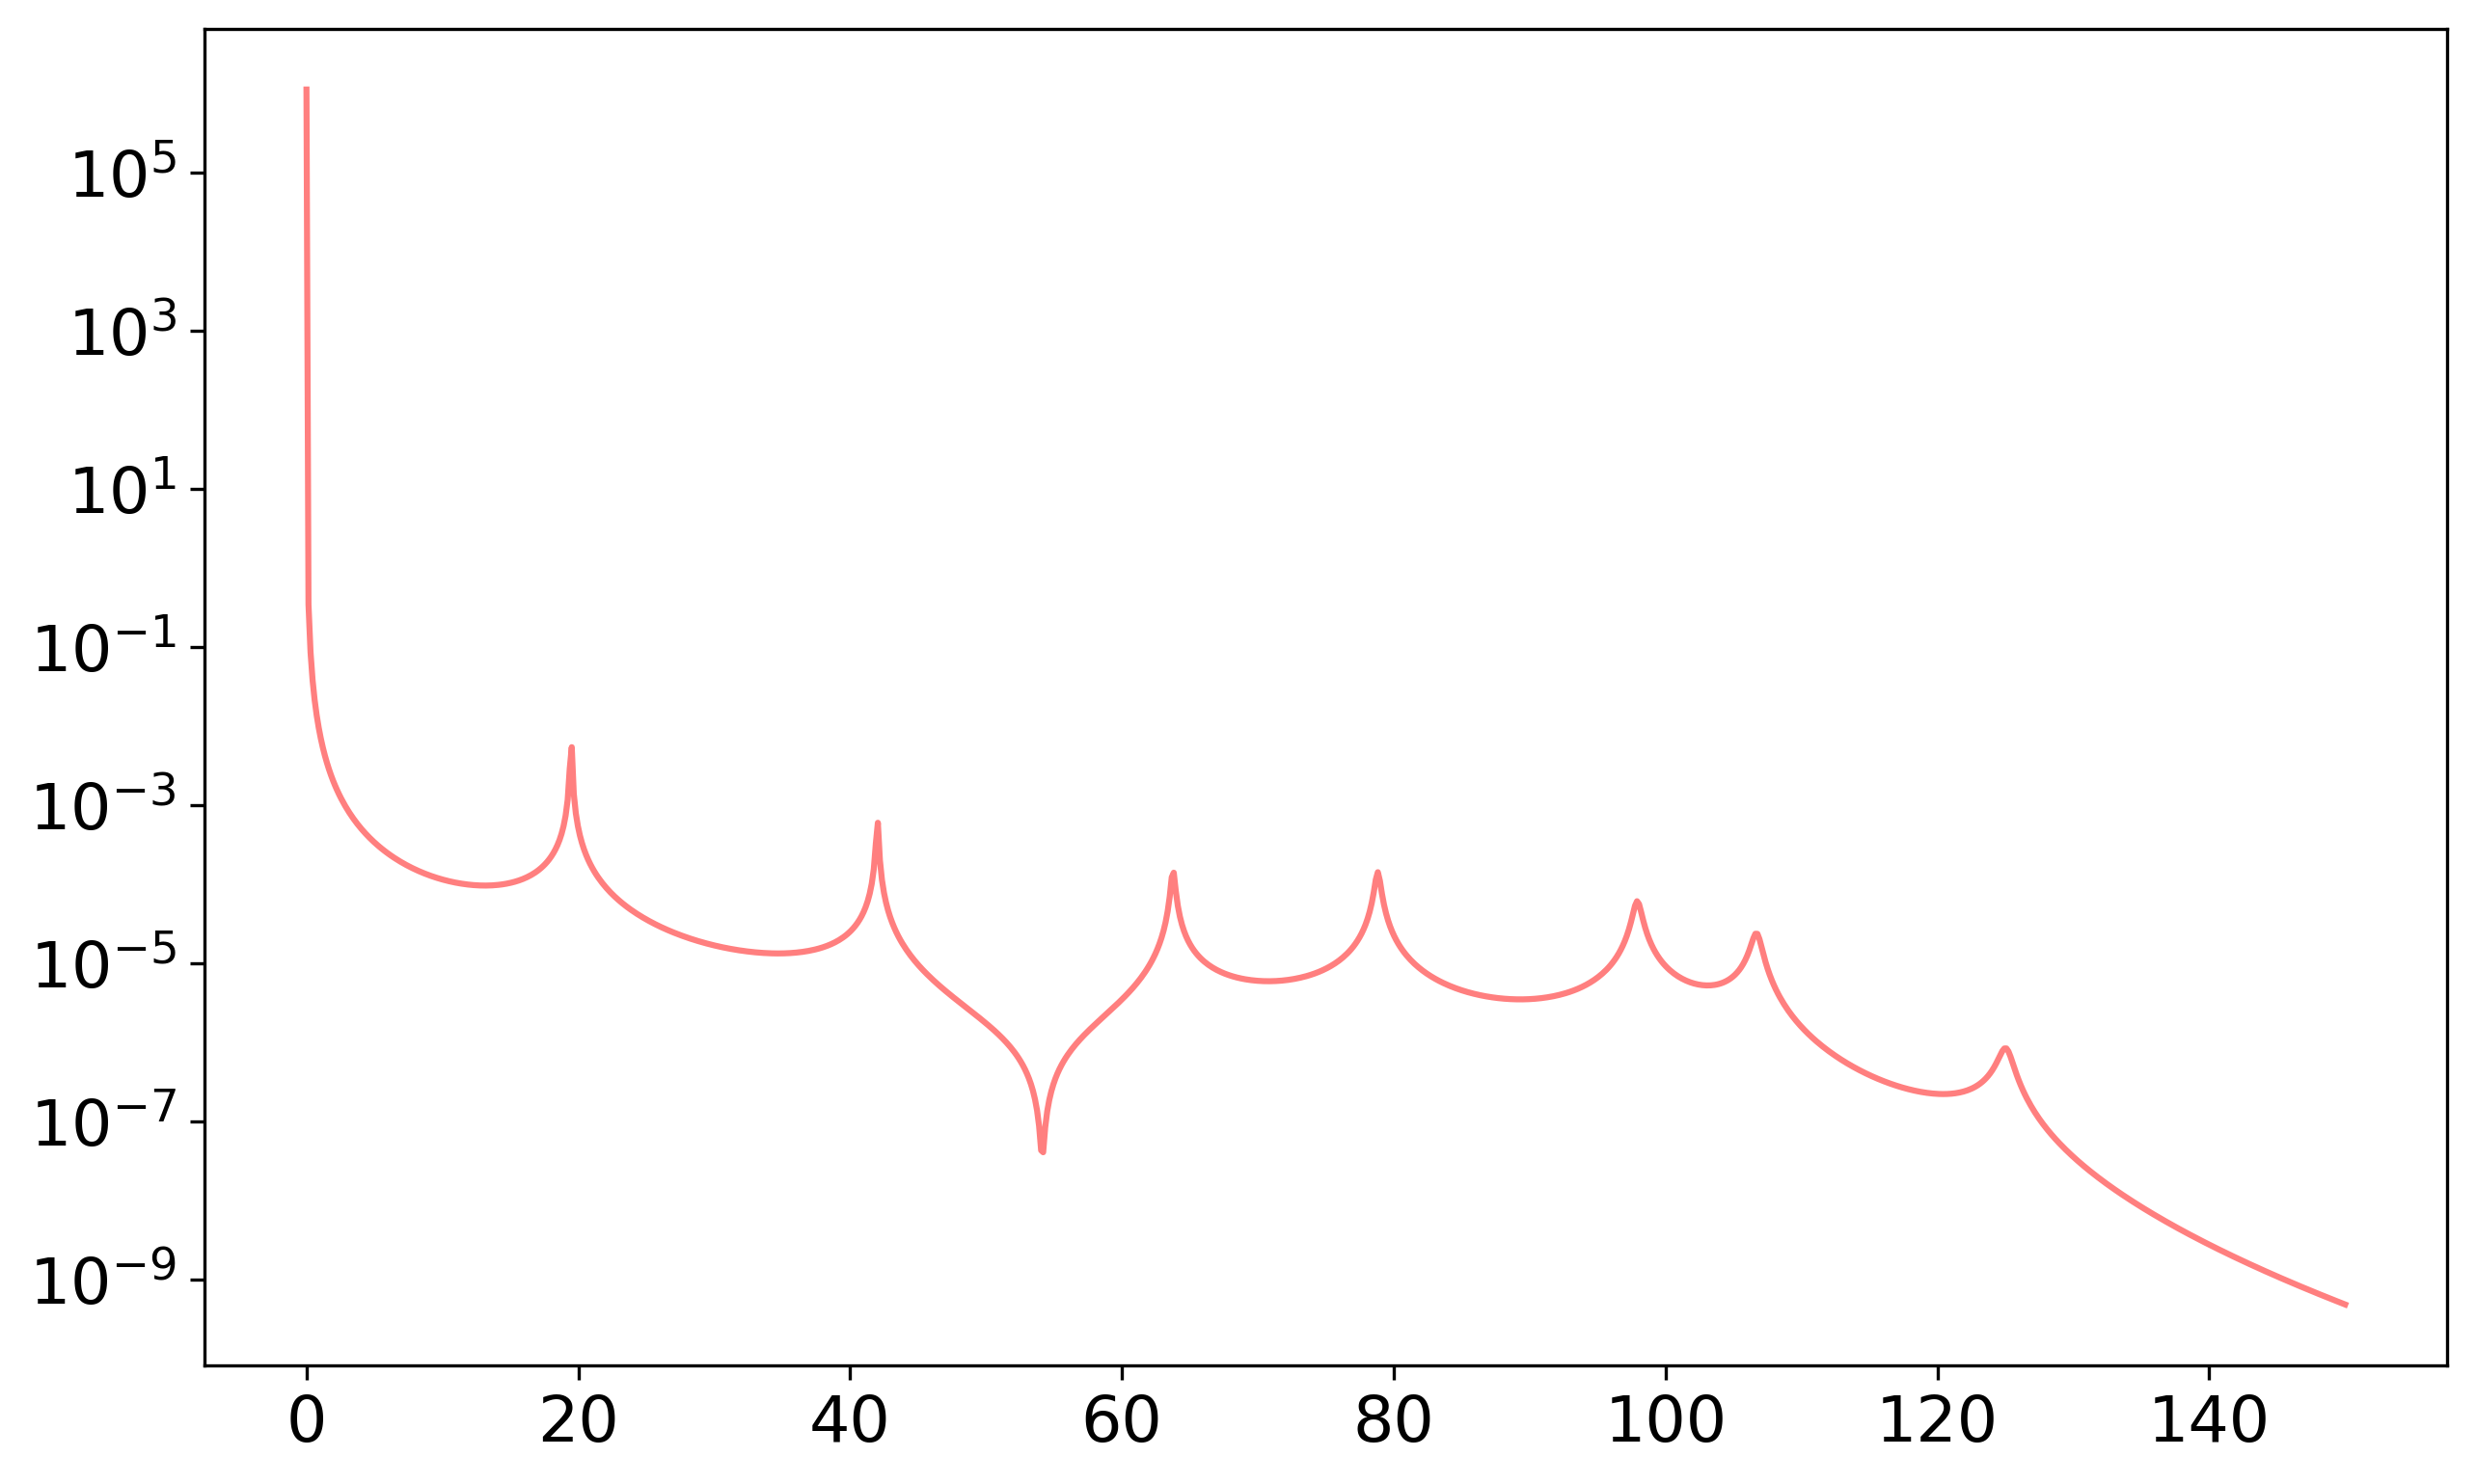

In [22]:
population_manipulator = PopulationManipulator(population)

requests = [{'type': 'anomaly', 'location': 5, 'anomaly_size': anomaly_level, 'anomaly_type': 'stiffness'},
{'type': 'environment', 'latent_value': latent, 'coefficients': 'load'},
            ]
population_affected = population_manipulator.affect(requests)
sys= MdofSystem(**population_affected.systems_matrices['system_0'])
transfer_functions=np.abs(sys.transfer_function(omega,i=1,j=7))
plt.plot(frequency, transfer_functions, color='red', alpha=0.5)
plt.yscale('log')

# Vary input force location 


In [23]:
frequencies = dict()
transfer_functions = dict()
for loc in range(2,7):
    

    sys= MdofSystem(**population.systems_matrices['system_0'])
    frequency = np.linspace(0, 150, 1000)
    omega = 2 * np.pi * frequency
    frequencies[loc]=sys.resonance_frequency()[::-1]
    transfer_functions[loc]=np.abs(sys.transfer_function(omega,i=1,j=loc))


In [24]:
frequencies

{2: array([8.77868517e-05, 2.27287546e+01, 4.45874025e+01, 6.64553264e+01,
        8.39611682e+01, 9.78847367e+01, 1.11705624e+02, 1.18151272e+02]),
 3: array([8.77868517e-05, 2.27287546e+01, 4.45874025e+01, 6.64553264e+01,
        8.39611682e+01, 9.78847367e+01, 1.11705624e+02, 1.18151272e+02]),
 4: array([8.77868517e-05, 2.27287546e+01, 4.45874025e+01, 6.64553264e+01,
        8.39611682e+01, 9.78847367e+01, 1.11705624e+02, 1.18151272e+02]),
 5: array([8.77868517e-05, 2.27287546e+01, 4.45874025e+01, 6.64553264e+01,
        8.39611682e+01, 9.78847367e+01, 1.11705624e+02, 1.18151272e+02]),
 6: array([8.77868517e-05, 2.27287546e+01, 4.45874025e+01, 6.64553264e+01,
        8.39611682e+01, 9.78847367e+01, 1.11705624e+02, 1.18151272e+02])}

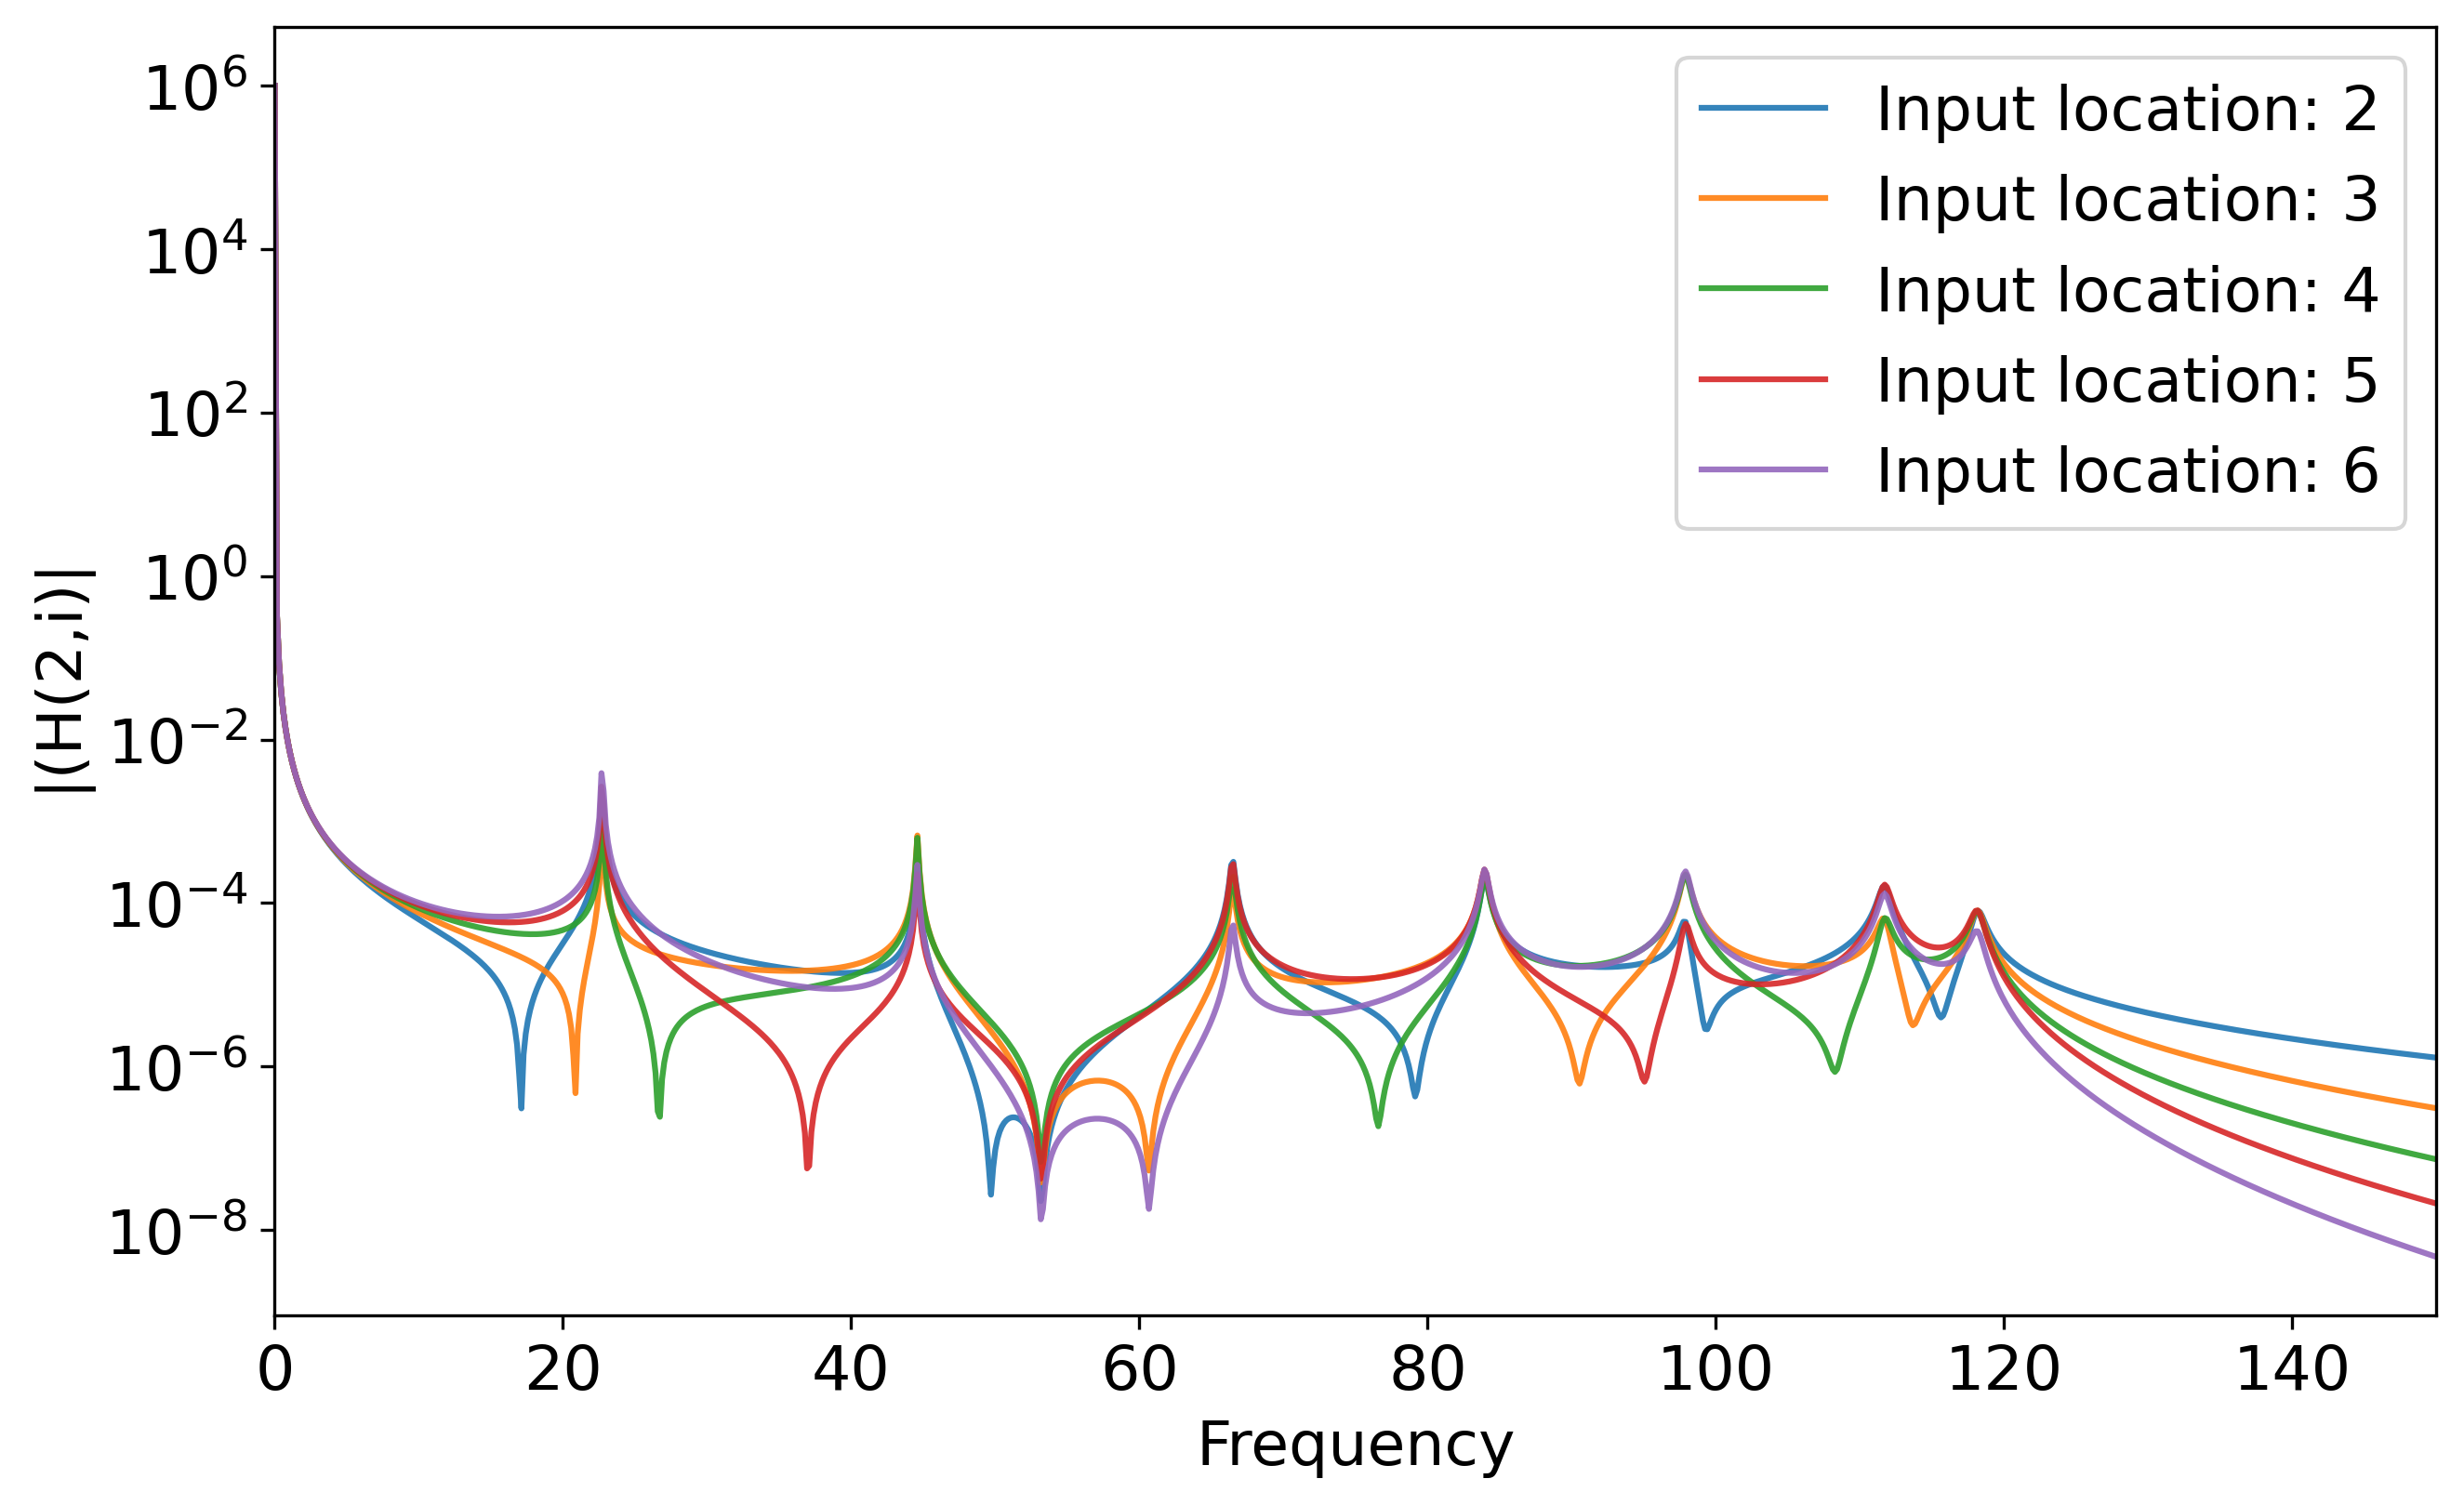

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()

for i,loc in enumerate(list(frequencies.keys())):
    ax.plot(frequency, np.abs(transfer_functions[loc])[:], alpha=0.9, label='Input location: {}'.format(loc))
ax.set_yscale('log')
ax.set_xlabel('Frequency')
ax.set_ylabel('|(H(2,i)|')


# set the label for the color bar
cbar.set_label('latent variable')
plt.margins(x=0)
plt.legend()
plt.show()

# vary input forve and amplitude white excitation 


In [29]:
from scipy.signal import welch
def compute_PSD(data: np.ndarray, fs: float):
    return welch(data, fs=fs, nperseg=1024, noverlap=512, nfft=1024, detrend='constant')


In [53]:
from PBSHM_mdof.system.simulation import Simulation
from tqdm import tqdm
frequencies = dict()
psds = list()
amplitudes=list()
dt= 0.0025
t_end = 5
simulator = Simulation(population, dt, t_end)
amplitudes=np.linspace(0.1,30,100)
for amp in tqdm(amplitudes):
    loc = np.random.randint(2,7)
    data = simulator.simulation_white_noise(location = loc ,amplitude= amp)
    signal=data["system_0"]['output'][:,2*8+1]
    f,psd=compute_PSD(signal,1/dt)
    psds.append(psd)


100%|██████████| 100/100 [00:28<00:00,  3.54it/s]


/tmp/ipykernel_84776/626680212.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scm)


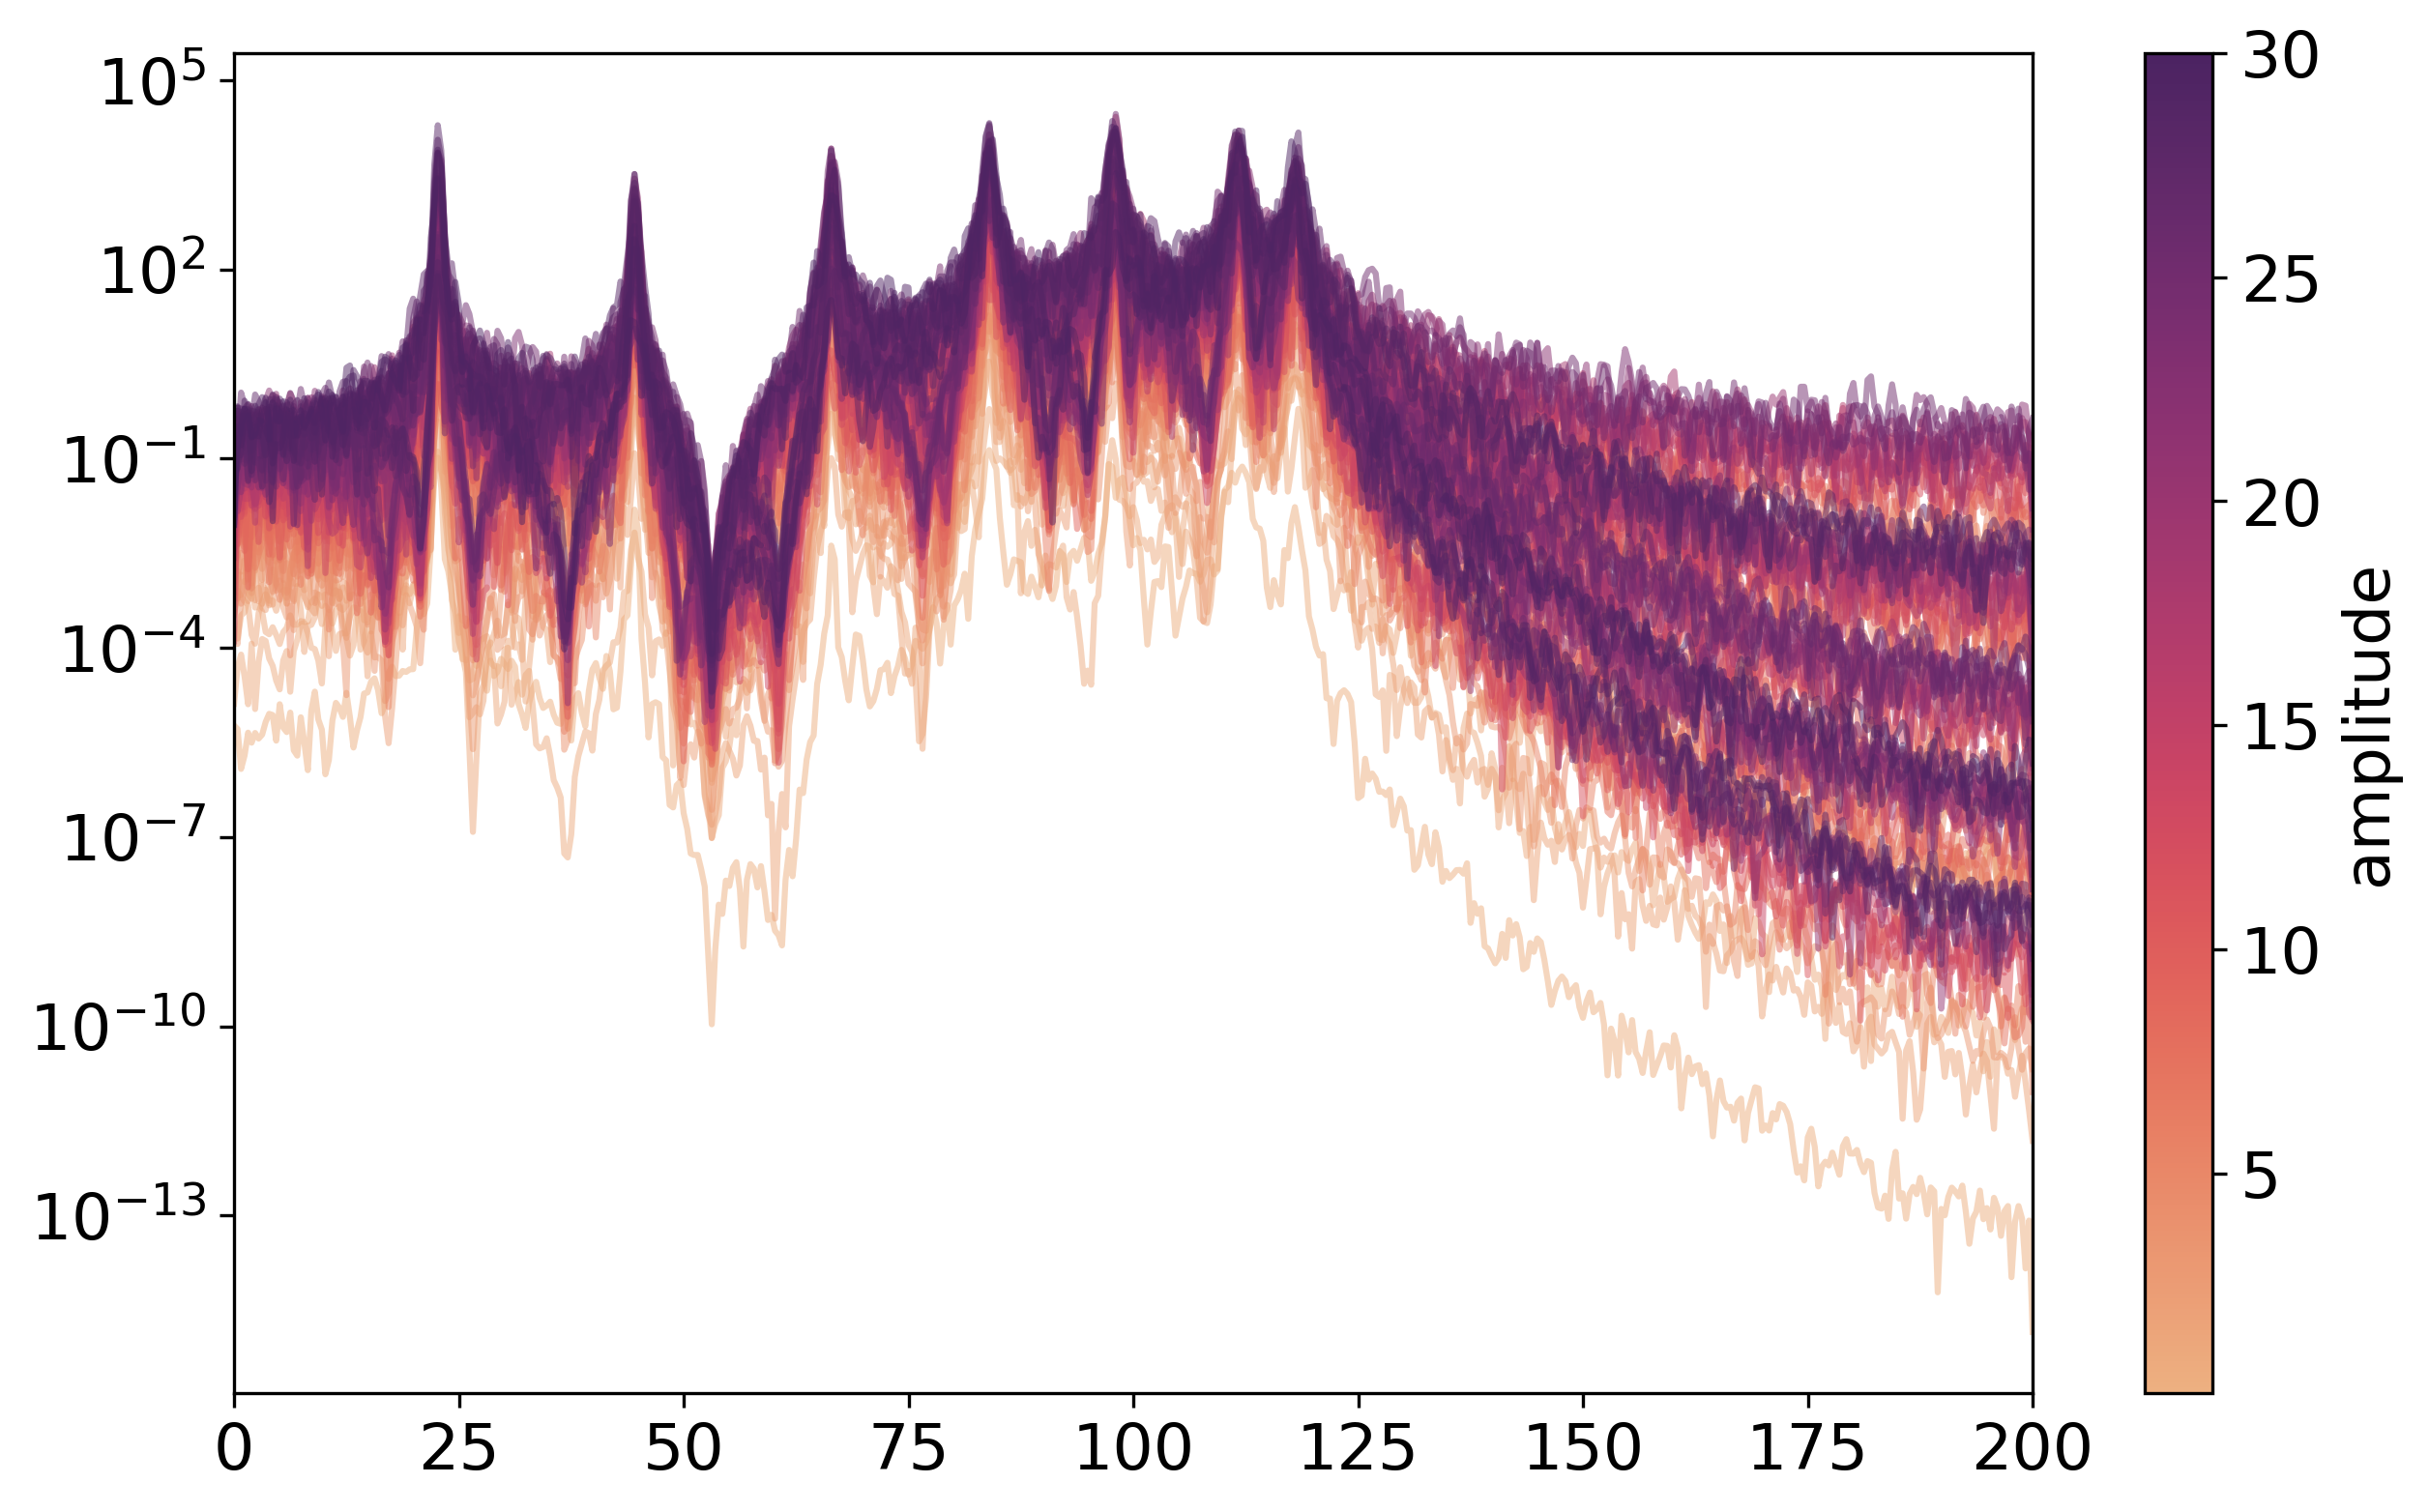

In [54]:
color = sns.color_palette('flare',len(amplitudes))

for i,psd in enumerate(psds):
    plt.plot(f,psd, alpha=0.5,c=color[i])
plt.yscale('log')
scm = plt.cm.ScalarMappable(cmap='flare')
scm.set_array(amplitudes)
cbar = plt.colorbar(scm)

# set the label for the color bar
cbar.set_label('amplitude')
plt.margins(x=0)
plt.show()